# Webscrapping - Vários Exemplos de Raspagem de Dados Governamentais

# Projeto de Análise de dados Completo

Escopo 
Produzir uma análise de dados da Covid-19 no Brasil, integrando dados obtidos por raspagem de dados do Ministério da Saúde, do IBGE,e do Tesouro Nacional 
https://www.tesourotransparente.gov.br/temas/estados-e-municipios/transferencias-a-estados-e-municipios

In [190]:
import requests
import os
from zipfile import ZipFile
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import json
import html
import matplotlib.pyplot as plt
import string
import seaborn as sns

# Importar dados da Covid do Ministério da Saúde

In [199]:
link = "https://qd28tcd6b5.execute-api.sa-east-1.amazonaws.com/prod/PortalGeral"
header_text  = {
    "X-Parse-Application-Id": "unAFkcaNDeXajurGB7LChj8SgQYS2ptm"
}

r = requests.get(link, headers=header_text)
json_covid = r.json()


url_arquivo = json_covid['results'][0]['arquivo']['url']
print(url_arquivo)

https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/0b6c0d7a103115694fa58843edaff9b5_HIST_PAINEL_COVIDBR_29nov2024.zip


In [200]:
json_covid

{'results': [{'objectId': 'HXxFBK2BTx',
   'total_confirmado': '162.699',
   'createdAt': '2020-03-25T16:28:25.593Z',
   'updatedAt': '2024-12-03T12:36:58.178Z',
   'total_obitos': '11.123',
   'versao': 'v2.0',
   'dt_atualizacao': '03/12/2024 15:30',
   'total_letalidade': '6,8%',
   'arquivo_srag': {'__type': 'File',
    'name': '0f7290d807e00e3dfe98197d2586f1c2_arquivo_srag20200420.csv',
    'url': 'https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/0f7290d807e00e3dfe98197d2586f1c2_arquivo_srag20200420.csv'},
   'texto_rodape': 'HIST_PAINEL_COVIDBR_29nov2024.zip',
   'arquivo': {'__type': 'File',
    'name': '0b6c0d7a103115694fa58843edaff9b5_HIST_PAINEL_COVIDBR_29nov2024.zip',
    'url': 'https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/0b6c0d7a103115694fa58843edaff9b5_HIST_PAINEL_COVIDBR_29nov2024.zip'},
   'dt_atualizacao_srag': '20/01/2021 17:00'}]}

In [201]:
metadados = json_covid['results'][0]
for item in metadados.items():
  print(item)

('objectId', 'HXxFBK2BTx')
('total_confirmado', '162.699')
('createdAt', '2020-03-25T16:28:25.593Z')
('updatedAt', '2024-12-03T12:36:58.178Z')
('total_obitos', '11.123')
('versao', 'v2.0')
('dt_atualizacao', '03/12/2024 15:30')
('total_letalidade', '6,8%')
('arquivo_srag', {'__type': 'File', 'name': '0f7290d807e00e3dfe98197d2586f1c2_arquivo_srag20200420.csv', 'url': 'https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/0f7290d807e00e3dfe98197d2586f1c2_arquivo_srag20200420.csv'})
('texto_rodape', 'HIST_PAINEL_COVIDBR_29nov2024.zip')
('arquivo', {'__type': 'File', 'name': '0b6c0d7a103115694fa58843edaff9b5_HIST_PAINEL_COVIDBR_29nov2024.zip', 'url': 'https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/0b6c0d7a103115694fa58843edaff9b5_HIST_PAINEL_COVIDBR_29nov2024.zip'})
('dt_atualizacao_srag', '20/01/2021 17:00')


In [202]:
nome_arquivo_covid = metadados['texto_rodape']
print(nome_arquivo_covid)
link_arquivo = metadados['arquivo']['url']
print(link_arquivo)

HIST_PAINEL_COVIDBR_29nov2024.zip
https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/0b6c0d7a103115694fa58843edaff9b5_HIST_PAINEL_COVIDBR_29nov2024.zip


In [203]:
# Baixa o arquivo e confere o status
r = requests.get(link_arquivo)
r

<Response [200]>

In [204]:
# Salva o arquivo zipado
with open(nome_arquivo_covid, 'wb') as f:
    f.write(r.content)


In [205]:
# Extrai o arquivo zipado
diratual = os.getcwd()
dircovid = os.path.join(diratual, "painel_covid")

with ZipFile(nome_arquivo_covid, 'r') as zip_ref:
    zip_ref.extractall(dircovid)

In [206]:
# instruções para criar o df concatenado
os.listdir(dircovid)

dataset_list = os.listdir(dircovid)

caminhos_arquivos = [os.path.join(dircovid, arquivo) for arquivo in dataset_list]

dataset_full = []

for caminho in caminhos_arquivos:
        df = pd.read_csv(caminho, delimiter=';')
        dataset_full.append(df)


nome_arquivo_covid_csv = f'{nome_arquivo_covid[:-4]}.csv'

df = pd.concat(dataset_full, ignore_index=True)
df.to_csv(nome_arquivo_covid_csv, index=False, sep=';')

### Criar o dataframe usando o read_csv

In [207]:
dfcovid = pd.read_csv(nome_arquivo_covid_csv,delimiter=';')

os.remove(nome_arquivo_covid_csv)
os.remove(nome_arquivo_covid)

dfcovid.head(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN
5,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-01,10,210147125.0,2.0,0,0,0,1.0,1.0,NaN
6,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-02,10,210147125.0,2.0,0,0,0,0.0,2.0,NaN
7,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-03,10,210147125.0,2.0,0,0,0,0.0,2.0,NaN
8,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-04,10,210147125.0,3.0,1,0,0,1.0,2.0,NaN
9,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-05,10,210147125.0,7.0,4,0,0,4.0,3.0,NaN


# Downloads das transferências da União para os Estados do Tesouro Nacional

In [11]:
link = 'https://sisweb.tesouro.gov.br/apex/f?p=2600:1::IR%5Brelatorio-transferencias-estados%5D_CSV::::'
header_text = '''Host: sisweb.tesouro.gov.br
Connection: keep-alive
sec-ch-ua: "Google Chrome";v="87", "Not;A Brand";v="99", "Chromium";v="87"
sec-ch-ua-mobile: ?0
Upgrade-Insecure-Requests: 1
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9
Sec-Fetch-Site: same-origin
Sec-Fetch-Mode: navigate
Sec-Fetch-User: ?1
Sec-Fetch-Dest: document
Referer: https://sisweb.tesouro.gov.br/apex/f?p=2600:1::IR_962295:NO:::
Accept-Encoding: gzip, deflate, br
Accept-Language: pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7
'''

headerdict = { x.split(':')[0].strip() :  x.split(':')[1].strip()for x in header_text.splitlines()}
r = requests.get(link, headers=headerdict)


In [12]:
r.content

b'"Regiao";"UF";"Ano";"Transfer\xeancia";"Valor Consolidado"\n"Centro-Oeste";"DF";"1997";"FPE";"R$67.670.060,55"\n"Centro-Oeste";"DF";"1997";"IPI-Exp";"R$108.291,80"\n"Centro-Oeste";"DF";"1998";"FPE";"R$64.066.428,82"\n"Centro-Oeste";"DF";"1998";"FUNDEF";"R$16.684.000,33"\n"Centro-Oeste";"DF";"1998";"IPI-Exp";"R$16.803,94"\n"Centro-Oeste";"DF";"1999";"FPE";"R$70.955.915,95"\n"Centro-Oeste";"DF";"1999";"FUNDEF";"R$18.521.578,84"\n"Centro-Oeste";"DF";"1999";"IPI-Exp";"R$29.579,04"\n"Centro-Oeste";"DF";"2000";"FPE";"R$84.083.329,09"\n"Centro-Oeste";"DF";"2000";"FUNDEF";"R$23.630.388,18"\n"Centro-Oeste";"DF";"2000";"IPI-Exp";"R$42.407,24"\n"Centro-Oeste";"DF";"2000";"LC 87/96 (Lei Kandir)";"R$18.714.587,63"\n"Centro-Oeste";"DF";"2001";"FPE";"R$98.950.508,72"\n"Centro-Oeste";"DF";"2001";"FUNDEF";"R$27.932.254,89"\n"Centro-Oeste";"DF";"2001";"IPI-Exp";"R$92.443,20"\n"Centro-Oeste";"DF";"2001";"LC 87/96 (Lei Kandir)";"R$24.650.876,52"\n"Centro-Oeste";"DF";"2001";"Royalties";"R$1,57"\n"Centro-

In [13]:
nome_arquivo_transferencias = 'transferencias_estados.csv'
with open(nome_arquivo_transferencias, 'wb') as f:
  f.write(r.content)

In [14]:
with open(nome_arquivo_transferencias, 'r', encoding='cp1252') as f:
  lines = f.readlines()

for line in lines[:10]:
  print(line)

"Regiao";"UF";"Ano";"Transferência";"Valor Consolidado"

"Centro-Oeste";"DF";"1997";"FPE";"R$67.670.060,55"

"Centro-Oeste";"DF";"1997";"IPI-Exp";"R$108.291,80"

"Centro-Oeste";"DF";"1998";"FPE";"R$64.066.428,82"

"Centro-Oeste";"DF";"1998";"FUNDEF";"R$16.684.000,33"

"Centro-Oeste";"DF";"1998";"IPI-Exp";"R$16.803,94"

"Centro-Oeste";"DF";"1999";"FPE";"R$70.955.915,95"

"Centro-Oeste";"DF";"1999";"FUNDEF";"R$18.521.578,84"

"Centro-Oeste";"DF";"1999";"IPI-Exp";"R$29.579,04"

"Centro-Oeste";"DF";"2000";"FPE";"R$84.083.329,09"



In [15]:
dftransferencias = pd.read_csv(nome_arquivo_transferencias, sep=';', encoding='cp1252')


os.remove(nome_arquivo_transferencias)

dftransferencias.head()

,Regiao,UF,Ano,Transferência,Valor Consolidado
0,Centro-Oeste,DF,1997,FPE,"R$67.670.060,55"
1,Centro-Oeste,DF,1997,IPI-Exp,"R$108.291,80"
2,Centro-Oeste,DF,1998,FPE,"R$64.066.428,82"
3,Centro-Oeste,DF,1998,FUNDEF,"R$16.684.000,33"
4,Centro-Oeste,DF,1998,IPI-Exp,"R$16.803,94"


# Download dos dados de PIB a preços correntes dos estados do site do IBGE

#### Usar o construtor de consultas da API de agregados do IBGE para criar a url desejada
- endereço de construtor de consultas da API: https://servicodados.ibge.gov.br/api/docs/agregados?versao=3#api-bq


#### Acessar o conteúdo usando o requests

In [79]:
url = 'https://servicodados.ibge.gov.br/api/v3/agregados/5938/periodos/2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021/variaveis/37?localidades=N3[all]'

r = requests.get(url)
json_agregado_pib_estadual = r.json()


In [80]:
nome_arquivo_pib = 'ibge_pib.json'
with open(nome_arquivo_pib, 'w') as f:
    json.dump(json_agregado_pib_estadual, f)

In [81]:
dadospib = []
for serie in json_agregado_pib_estadual[0]['resultados'][0]['series']:
  estado = {}
  estado['id_codigo_ibge'] = serie['localidade']['id']
  estado['uf_nome'] = serie['localidade']['nome']
  for pibano, pibvalor in serie['serie'].items():
    estado[pibano] = pibvalor
  dadospib.append(estado)
dadospib[0]

{'id_codigo_ibge': '11',
 'uf_nome': 'Rondônia',
 '2002': '7467630',
 '2003': '9425010',
 '2004': '11004641',
 '2005': '12511821',
 '2006': '13054713',
 '2007': '14438376',
 '2008': '17285542',
 '2009': '19725010',
 '2010': '23907887',
 '2011': '27574714',
 '2012': '30112720',
 '2013': '31121413',
 '2014': '34030982',
 '2015': '36563333',
 '2016': '39460359',
 '2017': '43516147',
 '2018': '44913978',
 '2019': '47091336',
 '2020': '51598741',
 '2021': '58170096'}

In [82]:
dfpib = pd.DataFrame(dadospib)

os.remove(nome_arquivo_pib)

dfpib.head()

,id_codigo_ibge,uf_nome,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,11,Rondônia,7467630,9425010,11004641,12511821,13054713,14438376,17285542,19725010,...,30112720,31121413,34030982,36563333,39460359,43516147,44913978,47091336,51598741,58170096
1,12,Acre,2971301,3377234,3784003,4300581,4661807,5458172,6410255,7407821,...,10137925,11473930,13458698,13622802,13754240,14272941,15331123,15630017,16476371,21374440
2,13,Amazonas,22093338,25862134,31090696,33980877,39933213,43479773,48115265,50559840,...,72242701,83051233,86668644,86568184,89039782,93240191,100109235,108181091,116019139,131531038
3,14,Roraima,2392033,2594081,2822757,3193430,3802452,4203302,4841862,5671975,...,7711467,9010725,9744122,10242905,11013237,12104709,13369988,14292227,16024276,18202579
4,15,Pará,26482159,30270152,37272726,40522893,45983027,51846876,60956978,61665096,...,107080881,121224847,124584945,130899505,138107514,155232404,161349602,178376984,215935604,262904979


# Download dos dados de população estimada dos estados da api do IBGE

In [20]:
url = 'https://servicodados.ibge.gov.br/api/v3/agregados/6579/periodos/2001|2002|2003|2004|2005|2006|2008|2009|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2024/variaveis/9324?localidades=N3[all]'
r = requests.get(url)
json_agregado_pop_estadual = r.json()

In [21]:
nome_arquivo_populacao = 'ibge_populacao.json'
with open(nome_arquivo_populacao, 'w') as f:
    json.dump(json_agregado_pop_estadual, f)

In [22]:
json_agregado_pop_estadual[0]['resultados'][0]['series'][0]

{'localidade': {'id': '11',
  'nivel': {'id': 'N3', 'nome': 'Unidade da Federação'},
  'nome': 'Rondônia'},
 'serie': {'2001': '1407886',
  '2002': '1431777',
  '2003': '1455907',
  '2004': '1562085',
  '2005': '1534594',
  '2006': '1562417',
  '2008': '1493565',
  '2009': '1503928',
  '2011': '1576455',
  '2012': '1590011',
  '2013': '1728214',
  '2014': '1748531',
  '2015': '1768204',
  '2016': '1787279',
  '2017': '1805788',
  '2018': '1757589',
  '2019': '1777225',
  '2020': '1796460',
  '2021': '1815278',
  '2024': '1746227'}}

In [23]:
dadospopulacao = []
for serie in json_agregado_pop_estadual[0]['resultados'][0]['series']:
  estado = {}
  estado['id_codigo_ibge'] = serie['localidade']['id']
  estado['uf_nome'] = serie['localidade']['nome']
  for populacaoano, populacaovalor in serie['serie'].items():
    estado[populacaoano] = populacaovalor
  dadospopulacao.append(estado)
dadospopulacao[0]

{'id_codigo_ibge': '11',
 'uf_nome': 'Rondônia',
 '2001': '1407886',
 '2002': '1431777',
 '2003': '1455907',
 '2004': '1562085',
 '2005': '1534594',
 '2006': '1562417',
 '2008': '1493565',
 '2009': '1503928',
 '2011': '1576455',
 '2012': '1590011',
 '2013': '1728214',
 '2014': '1748531',
 '2015': '1768204',
 '2016': '1787279',
 '2017': '1805788',
 '2018': '1757589',
 '2019': '1777225',
 '2020': '1796460',
 '2021': '1815278',
 '2024': '1746227'}

In [24]:
dfpopulacao = pd.DataFrame(dadospopulacao)

os.remove(nome_arquivo_populacao)

dfpopulacao.head()

,id_codigo_ibge,uf_nome,2001,2002,2003,2004,2005,2006,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2024
0,11,Rondônia,1407886,1431777,1455907,1562085,1534594,1562417,1493565,1503928,...,1728214,1748531,1768204,1787279,1805788,1757589,1777225,1796460,1815278,1746227
1,12,Acre,574355,586942,600595,630328,669736,686652,680075,691132,...,776463,790101,803513,816687,829619,869265,881935,894470,906876,880631
2,13,Amazonas,2900240,2961801,3031068,3138726,3232330,3311026,3341094,3393369,...,3807921,3873743,3938336,4001667,4063614,4080611,4144597,4207714,4269995,4281209
3,14,Roraima,337237,346871,357302,381896,391317,403344,412783,421499,...,488072,496936,505665,514229,522636,576568,605761,631181,652713,716793
4,15,Pará,6341736,6453683,6574993,6850181,6970586,7110465,7321490,7431020,...,7969654,8073924,8175113,8272724,8366628,8513497,8602865,8690745,8777124,8664306


# Download dos dados da página do IBGE Cidades e Estados 

https://www.ibge.gov.br/cidades-e-estados

In [25]:
link = "https://www.ibge.gov.br/cidades-e-estados"
header_text = '''User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7
Referer: https://www.ibge.gov.br/cidades-e-estados
Content-Type: application/x-www-form-urlencoded; charset=UTF-8
'''
headerdict = { x.split(':')[0].strip() :  x.split(':')[1].strip()for x in header_text.splitlines()}

dados_text = '''ask: exportData
formato: csv
tipo: estados
view: exportacao
format: raw
codigo: xx
municipio: Brasil
b28bf8b221a274fd1f63acda16468017: 1
'''
datadict = { x.split(':')[0].strip() :  x.split(':')[1].strip()for x in dados_text.splitlines()}

r = requests.post(link, headers=headerdict, data=datadict )

In [26]:
r.content

b'Estados do Brasil\nUF [-],C&oacute;digo [-],Gent&iacute;lico [-],Governador [2023],Capital [2010],&Aacute;rea Territorial - km&sup2; [2022],Popula&ccedil;&atilde;o residente - pessoas [2022],Densidade demogr&aacute;fica - hab/km&sup2; [2022],Matri\xcc\x81culas no ensino fundamental - matr&iacute;culas [2023],IDH &lt;span&gt;I\xcc\x81ndice de desenvolvimento humano&lt;/span&gt; [2021],Total de receitas brutas realizadas - R$ [2023],Total de despesas brutas empenhadas - R$ [2023],Rendimento mensal domiciliar per capita - R$ [2023],Total de ve&iacute;culos - ve&iacute;culos [2023],\nAcre,12,acriano,GLADSON DE LIMA CAMELI,Rio Branco,164173.429,830018,5.06,147350,0.71,11137410342.21,10302403420.85,1095,350273,\nAlagoas,27,alagoano,PAULO SURUAGY DO AMARAL DANTAS,Macei&oacute;,27830.661,3127683,112.38,439014,0.684,20927817222.51,17963587096.92,1110,1095144,\nAmap&aacute;,16,amapaense,CL&Eacute;CIO LU&Iacute;S VILHENA VIEIRA,Macap&aacute;,142470.762,733759,5.15,131948,0.688,11249572238.02,85

In [27]:
nome_arquivo_ibge_estados = 'ibge_estados.csv'
with open(nome_arquivo_ibge_estados, 'w') as f:
  f.write(html.unescape(r.text))

In [28]:
with open(nome_arquivo_ibge_estados, 'r') as f:
  lines = f.readlines()

for line in lines[:10]:
  print(line)

Estados do Brasil

UF [-],Código [-],Gentílico [-],Governador [2023],Capital [2010],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Matrículas no ensino fundamental - matrículas [2023],IDH <span>Índice de desenvolvimento humano</span> [2021],Total de receitas brutas realizadas - R$ [2023],Total de despesas brutas empenhadas - R$ [2023],Rendimento mensal domiciliar per capita - R$ [2023],Total de veículos - veículos [2023],

Acre,12,acriano,GLADSON DE LIMA CAMELI,Rio Branco,164173.429,830018,5.06,147350,0.71,11137410342.21,10302403420.85,1095,350273,

Alagoas,27,alagoano,PAULO SURUAGY DO AMARAL DANTAS,Maceió,27830.661,3127683,112.38,439014,0.684,20927817222.51,17963587096.92,1110,1095144,

Amapá,16,amapaense,CLÉCIO LUÍS VILHENA VIEIRA,Macapá,142470.762,733759,5.15,131948,0.688,11249572238.02,8505172844.49,1520,242574,

Amazonas,13,amazonense,WILSON MIRANDA LIMA,Manaus,1559255.881,3941613,2.53,692623,0.7,33030751885.07,300293708

In [29]:
nome_arquivo_ibge_estados

'ibge_estados.csv'

In [30]:
lines[30]

'<table class="fontes-container"><tr><th>Fontes:</th></tr><tr><td>Área Territorial: Área territorial brasileira 2022. Rio de Janeiro: IBGE, 2023</td></tr><tr><td>População residente: Censo 2022: População e Domicílios - Primeiros Resultados - Atualizado em 22/12/2023</td></tr><tr><td>Densidade demográfica: Censo 2022: População e Domicílios - Primeiros Resultados - Atualizado em 22/12/2023</td></tr><tr><td>IDH <span>Índice de desenvolvimento humano</span>: Programa das Nações Unidas para o Desenvolvimento - PNUD</td></tr><tr><td>Matrículas no ensino fundamental: INSTITUTO NACIONAL DE ESTUDOS E PESQUISAS EDUCACIONAIS ANÍSIO TEIXEIRA. Sinopse Estatística da Educação Básica 2018. Brasília: Inep, 2019. Disponível em <http://portal.inep.gov.br/sinopses-estatisticas-da-educacao-basica>. Acesso em: 10 05. 2019.</td></tr><tr><td>Total de veículos: Ministério da Infraestrutura, Departamento Nacional de Trânsito - DENATRAN - 2018</td></tr><tr><td>Total de receitas brutas realizadas: Siconfi: S

In [31]:
dfibgeestados = pd.read_csv(nome_arquivo_ibge_estados, sep=',' , skiprows=1, nrows=27)

os.remove(nome_arquivo_ibge_estados)

dfibgeestados.head()

,UF [-],Código [-],Gentílico [-],Governador [2023],Capital [2010],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Matrículas no ensino fundamental - matrículas [2023],IDH <span>Índice de desenvolvimento humano</span> [2021],Total de receitas brutas realizadas - R$ [2023],Total de despesas brutas empenhadas - R$ [2023],Rendimento mensal domiciliar per capita - R$ [2023],Total de veículos - veículos [2023],Unnamed: 14
0,Acre,12,acriano,GLADSON DE LIMA CAMELI,Rio Branco,164173.429,830018,5.06,147350,0.710,1.113741e+10,1.030240e+10,1095,350273,NaN
1,Alagoas,27,alagoano,PAULO SURUAGY DO AMARAL DANTAS,Maceió,27830.661,3127683,112.38,439014,0.684,2.092782e+10,1.796359e+10,1110,1095144,NaN
2,Amapá,16,amapaense,CLÉCIO LUÍS VILHENA VIEIRA,Macapá,142470.762,733759,5.15,131948,0.688,1.124957e+10,8.505173e+09,1520,242574,NaN
3,Amazonas,13,amazonense,WILSON MIRANDA LIMA,Manaus,1559255.881,3941613,2.53,692623,0.700,3.303075e+10,3.002937e+10,1172,1130055,NaN
4,Bahia,29,baiano,JERÔNIMO RODRIGUES SOUZA,Salvador,564760.429,14141626,25.04,1865574,0.691,8.029052e+10,7.786804e+10,1139,5120353,NaN


In [32]:
dfibgeestados.tail()

,UF [-],Código [-],Gentílico [-],Governador [2023],Capital [2010],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Matrículas no ensino fundamental - matrículas [2023],IDH <span>Índice de desenvolvimento humano</span> [2021],Total de receitas brutas realizadas - R$ [2023],Total de despesas brutas empenhadas - R$ [2023],Rendimento mensal domiciliar per capita - R$ [2023],Total de veículos - veículos [2023],Unnamed: 14
22,Roraima,14,roraimense,ANTONIO OLIVERIO GARCIA DE ALMEIDA,Boa Vista,223644.530,636707,2.85,111096,0.699,8.846153e+09,7.473221e+09,1425,275703,NaN
23,Santa Catarina,42,catarinense ou barriga-verde,JORGINHO DOS SANTOS MELLO,Florianópolis,95730.690,7610361,79.50,941272,0.792,6.144024e+10,4.392730e+10,2269,6189405,NaN
24,São Paulo,35,paulista,TARCISIO GOMES DE FREITAS,São Paulo,248219.485,44411238,178.92,5343271,0.806,3.436344e+11,3.283156e+11,2492,33264096,NaN
25,Sergipe,28,sergipano ou sergipense,FÁBIO CRUZ MITIDIERI,Aracaju,21938.188,2210004,100.74,305930,0.702,1.715193e+10,1.347099e+10,1218,951523,NaN
26,Tocantins,17,tocantinense,WANDERLEI BARBOSA CASTRO,Palmas,277423.627,1511460,5.45,222404,0.731,2.083687e+10,1.587351e+10,1581,874905,NaN


# Download dos dados da API de localidades do IBGE



In [33]:
url = 'https://servicodados.ibge.gov.br/api/v1/localidades/estados'
r = requests.get(url)
json_localidades = r.json()
print(json_localidades)

[{'id': 11, 'sigla': 'RO', 'nome': 'Rondônia', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 12, 'sigla': 'AC', 'nome': 'Acre', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 13, 'sigla': 'AM', 'nome': 'Amazonas', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 14, 'sigla': 'RR', 'nome': 'Roraima', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 15, 'sigla': 'PA', 'nome': 'Pará', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 16, 'sigla': 'AP', 'nome': 'Amapá', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 17, 'sigla': 'TO', 'nome': 'Tocantins', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 21, 'sigla': 'MA', 'nome': 'Maranhão', 'regiao': {'id': 2, 'sigla': 'NE', 'nome': 'Nordeste'}}, {'id': 22, 'sigla': 'PI', 'nome': 'Piauí', 'regiao': {'id': 2, 'sigla': 'NE', 'nome': 'Nordeste'}}, {'id': 23, 'sigla': 'CE', 'nome': 'Ceará', 'regiao': {'id': 2, 'sigla': 'NE', 'nome': 'Nordeste'}}, {'id': 24, 'si

In [34]:
dflocalidades = pd.DataFrame(json_localidades)
dflocalidades.head()

,id,sigla,nome,regiao
0,11,RO,Rondônia,"{'id': 1, 'sigla': 'N', 'nome': 'Norte'}"
1,12,AC,Acre,"{'id': 1, 'sigla': 'N', 'nome': 'Norte'}"
2,13,AM,Amazonas,"{'id': 1, 'sigla': 'N', 'nome': 'Norte'}"
3,14,RR,Roraima,"{'id': 1, 'sigla': 'N', 'nome': 'Norte'}"
4,15,PA,Pará,"{'id': 1, 'sigla': 'N', 'nome': 'Norte'}"


In [35]:
dflocalidades['regiao_sigla'] = dflocalidades['regiao'].map(lambda x : x['sigla'])
dflocalidades['regiao'] = dflocalidades['regiao'].map(lambda x : x['nome'])
dflocalidades.head()

,id,sigla,nome,regiao,regiao_sigla
0,11,RO,Rondônia,Norte,N
1,12,AC,Acre,Norte,N
2,13,AM,Amazonas,Norte,N
3,14,RR,Roraima,Norte,N
4,15,PA,Pará,Norte,N


In [36]:
dflocalidades.columns = ['UF_CODIGO', 'UF_SIGLA', 'UF_NOME', 'REGIAO', 'REGIAO_SIGLA']
dflocalidades.head()

,UF_CODIGO,UF_SIGLA,UF_NOME,REGIAO,REGIAO_SIGLA
0,11,RO,Rondônia,Norte,N
1,12,AC,Acre,Norte,N
2,13,AM,Amazonas,Norte,N
3,14,RR,Roraima,Norte,N
4,15,PA,Pará,Norte,N


# Download de página contendo a áea urbanizada das Unidades federativas

In [119]:
table_MN = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_taxa_de_urbaniza%C3%A7%C3%A3o')
len(table_MN)

dfareaurbanizada = table_MN[1]
dfareaurbanizada.head()

,Posição,Unidade federativa,Taxa urbana,Taxa rural
0,1º,Rio de Janeiro,96.71,3.29
1,2º,Distrito Federal,96.62,3.38
2,3º,São Paulo,95.88,4.12
3,4º,Goiás,90.29,9.71
4,5º,Amapá,89.81,10.19


# Limpar os DataFrames deixando apenas os dados necessários

In [52]:
%who DataFrame

df	 dfareaurbanizada	 dfcovid	 dfibgeestados	 dflocalidades	 dfpib	 dfpopulacao	 dftransferencias	 


In [53]:
dfcovid.head() 

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN


In [54]:
filtro = (dfcovid['estado'].isna() == False ) & ( dfcovid['codmun'].isna()  )
dfcovid = dfcovid[filtro][['regiao', 'estado', 'data' , 'casosNovos', 'obitosNovos']]

dfcovid['mes'] = dfcovid['data'].map(lambda x : x[:7])


print(dfcovid.shape)
dfcovid.head()

(46818, 6)


,regiao,estado,data,casosNovos,obitosNovos,mes
158,Norte,RO,2020-02-25,0,0,2020-02
159,Norte,RO,2020-02-26,0,0,2020-02
160,Norte,RO,2020-02-27,0,0,2020-02
161,Norte,RO,2020-02-28,0,0,2020-02
162,Norte,RO,2020-02-29,0,0,2020-02


In [55]:
dfregiaouf = dfcovid[['regiao', 'estado', 'mes',  'casosNovos', 'obitosNovos']]\
  .groupby(['regiao', 'estado', 'mes' ])  \
  .agg({'casosNovos':'sum', 'obitosNovos':'sum'})\
  .reset_index()
dfregiaouf.head()

,regiao,estado,mes,casosNovos,obitosNovos
0,Centro-Oeste,DF,2020-02,0,0
1,Centro-Oeste,DF,2020-03,332,3
2,Centro-Oeste,DF,2020-04,1024,27
3,Centro-Oeste,DF,2020-05,8424,140
4,Centro-Oeste,DF,2020-06,39438,417


In [56]:
dfregiaouf.columns = ['REGIAO', 'UF_SIGLA', 'MÊS', 'QTD_CASOS', 'QTD_OBITOS']
dfregiaouf.head()

,REGIAO,UF_SIGLA,MÊS,QTD_CASOS,QTD_OBITOS
0,Centro-Oeste,DF,2020-02,0,0
1,Centro-Oeste,DF,2020-03,332,3
2,Centro-Oeste,DF,2020-04,1024,27
3,Centro-Oeste,DF,2020-05,8424,140
4,Centro-Oeste,DF,2020-06,39438,417


In [57]:
del dfcovid

In [58]:
print( { k : v for k, v in dfregiaouf.dtypes.items()})

{'REGIAO': dtype('O'), 'UF_SIGLA': dtype('O'), 'MÊS': dtype('O'), 'QTD_CASOS': dtype('int64'), 'QTD_OBITOS': dtype('int64')}


In [59]:
tiposdict = {'REGIAO':'string' ,
             'UF_SIGLA': 'string' , 
             'MÊS': 'string' , 
             'QTD_CASOS': 'int64', 
             'QTD_OBITOS': 'int64'}

In [60]:
dfregiaouf = dfregiaouf.astype(tiposdict)
dfregiaouf.dtypes

REGIAO        string[python]
UF_SIGLA      string[python]
MÊS           string[python]
QTD_CASOS              int64
QTD_OBITOS             int64
dtype: object

In [61]:
dfregiaouf.head()

,REGIAO,UF_SIGLA,MÊS,QTD_CASOS,QTD_OBITOS
0,Centro-Oeste,DF,2020-02,0,0
1,Centro-Oeste,DF,2020-03,332,3
2,Centro-Oeste,DF,2020-04,1024,27
3,Centro-Oeste,DF,2020-05,8424,140
4,Centro-Oeste,DF,2020-06,39438,417


# dfibgeestados	 

In [62]:
dfibgeestados.head()

,UF [-],Código [-],Gentílico [-],Governador [2023],Capital [2010],Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Matrículas no ensino fundamental - matrículas [2023],IDH <span>Índice de desenvolvimento humano</span> [2021],Total de receitas brutas realizadas - R$ [2023],Total de despesas brutas empenhadas - R$ [2023],Rendimento mensal domiciliar per capita - R$ [2023],Total de veículos - veículos [2023],Unnamed: 14
0,Acre,12,acriano,GLADSON DE LIMA CAMELI,Rio Branco,164173.429,830018,5.06,147350,0.710,1.113741e+10,1.030240e+10,1095,350273,NaN
1,Alagoas,27,alagoano,PAULO SURUAGY DO AMARAL DANTAS,Maceió,27830.661,3127683,112.38,439014,0.684,2.092782e+10,1.796359e+10,1110,1095144,NaN
2,Amapá,16,amapaense,CLÉCIO LUÍS VILHENA VIEIRA,Macapá,142470.762,733759,5.15,131948,0.688,1.124957e+10,8.505173e+09,1520,242574,NaN
3,Amazonas,13,amazonense,WILSON MIRANDA LIMA,Manaus,1559255.881,3941613,2.53,692623,0.700,3.303075e+10,3.002937e+10,1172,1130055,NaN
4,Bahia,29,baiano,JERÔNIMO RODRIGUES SOUZA,Salvador,564760.429,14141626,25.04,1865574,0.691,8.029052e+10,7.786804e+10,1139,5120353,NaN


In [64]:
coluna_selecionadas = ['UF [-]', 'Código [-]', 'Governador [2023]',
       'Área Territorial - km² [2022]',
       'IDH <span>Índice de desenvolvimento humano</span> [2021]',
       'Rendimento mensal domiciliar per capita - R$ [2023]']
dfibgeestados = dfibgeestados[coluna_selecionadas]
dfibgeestados.head()

,UF [-],Código [-],Governador [2023],Área Territorial - km² [2022],IDH <span>Índice de desenvolvimento humano</span> [2021],Rendimento mensal domiciliar per capita - R$ [2023]
0,Acre,12,GLADSON DE LIMA CAMELI,164173.429,0.710,1095
1,Alagoas,27,PAULO SURUAGY DO AMARAL DANTAS,27830.661,0.684,1110
2,Amapá,16,CLÉCIO LUÍS VILHENA VIEIRA,142470.762,0.688,1520
3,Amazonas,13,WILSON MIRANDA LIMA,1559255.881,0.700,1172
4,Bahia,29,JERÔNIMO RODRIGUES SOUZA,564760.429,0.691,1139


In [65]:
colunas_renomeadas = {'UF [-]' : 'UF_NOME', 'Código [-]': 'UF_CODIGO', 'Governador [2023]':'GOVERNADOR',
       'Área Territorial - km² [2022]': 'AREA_TERRIT_KM2',
       'IDH <span>Índice de desenvolvimento humano</span> [2021]':'IDH',
       'Rendimento mensal domiciliar per capita - R$ [2023]': 'RENDA_MENS_PER_CAPITA'}
dfibgeestados = dfibgeestados.rename(colunas_renomeadas, axis='columns')
dfibgeestados.head() 

,UF_NOME,UF_CODIGO,GOVERNADOR,AREA_TERRIT_KM2,IDH,RENDA_MENS_PER_CAPITA
0,Acre,12,GLADSON DE LIMA CAMELI,164173.429,0.710,1095
1,Alagoas,27,PAULO SURUAGY DO AMARAL DANTAS,27830.661,0.684,1110
2,Amapá,16,CLÉCIO LUÍS VILHENA VIEIRA,142470.762,0.688,1520
3,Amazonas,13,WILSON MIRANDA LIMA,1559255.881,0.700,1172
4,Bahia,29,JERÔNIMO RODRIGUES SOUZA,564760.429,0.691,1139


In [66]:
dfibgeestados['GOVERNADOR'] = dfibgeestados['GOVERNADOR'].str.title()

dfibgeestados.head()    

,UF_NOME,UF_CODIGO,GOVERNADOR,AREA_TERRIT_KM2,IDH,RENDA_MENS_PER_CAPITA
0,Acre,12,Gladson De Lima Cameli,164173.429,0.710,1095
1,Alagoas,27,Paulo Suruagy Do Amaral Dantas,27830.661,0.684,1110
2,Amapá,16,Clécio Luís Vilhena Vieira,142470.762,0.688,1520
3,Amazonas,13,Wilson Miranda Lima,1559255.881,0.700,1172
4,Bahia,29,Jerônimo Rodrigues Souza,564760.429,0.691,1139


In [67]:
print( { k : v for k, v in dfibgeestados.dtypes.items()})

{'UF_NOME': dtype('O'), 'UF_CODIGO': dtype('int64'), 'GOVERNADOR': dtype('O'), 'AREA_TERRIT_KM2': dtype('float64'), 'IDH': dtype('float64'), 'RENDA_MENS_PER_CAPITA': dtype('int64')}


In [68]:
tiposdict =  {'UF_NOME': 'string', 
         'UF_CODIGO': 'int64',
         'GOVERNADOR': 'string', 
         'AREA_TERRIT_KM2': 'float64', 
         'IDH': 'float64', 
         'RENDA_MENS_PER_CAPITA': 'float64'}

In [69]:
dfibgeestados = dfibgeestados.astype(tiposdict)
dfibgeestados.dtypes

UF_NOME                  string[python]
UF_CODIGO                         int64
GOVERNADOR               string[python]
AREA_TERRIT_KM2                 float64
IDH                             float64
RENDA_MENS_PER_CAPITA           float64
dtype: object

In [70]:
dfibgeestados.head()

,UF_NOME,UF_CODIGO,GOVERNADOR,AREA_TERRIT_KM2,IDH,RENDA_MENS_PER_CAPITA
0,Acre,12,Gladson De Lima Cameli,164173.429,0.710,1095.0
1,Alagoas,27,Paulo Suruagy Do Amaral Dantas,27830.661,0.684,1110.0
2,Amapá,16,Clécio Luís Vilhena Vieira,142470.762,0.688,1520.0
3,Amazonas,13,Wilson Miranda Lima,1559255.881,0.700,1172.0
4,Bahia,29,Jerônimo Rodrigues Souza,564760.429,0.691,1139.0


# dfpib	 

In [83]:
dfpib.head()

,id_codigo_ibge,uf_nome,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,11,Rondônia,7467630,9425010,11004641,12511821,13054713,14438376,17285542,19725010,...,30112720,31121413,34030982,36563333,39460359,43516147,44913978,47091336,51598741,58170096
1,12,Acre,2971301,3377234,3784003,4300581,4661807,5458172,6410255,7407821,...,10137925,11473930,13458698,13622802,13754240,14272941,15331123,15630017,16476371,21374440
2,13,Amazonas,22093338,25862134,31090696,33980877,39933213,43479773,48115265,50559840,...,72242701,83051233,86668644,86568184,89039782,93240191,100109235,108181091,116019139,131531038
3,14,Roraima,2392033,2594081,2822757,3193430,3802452,4203302,4841862,5671975,...,7711467,9010725,9744122,10242905,11013237,12104709,13369988,14292227,16024276,18202579
4,15,Pará,26482159,30270152,37272726,40522893,45983027,51846876,60956978,61665096,...,107080881,121224847,124584945,130899505,138107514,155232404,161349602,178376984,215935604,262904979


In [84]:
dfpib = dfpib[['id_codigo_ibge', 'uf_nome', '2021']]
print(dfpib.shape)
dfpib.columns = ['UF_CODIGO', 'UF_NOME', 'PIB2021']
dfpib.head()

(27, 3)


,UF_CODIGO,UF_NOME,PIB2021
0,11,Rondônia,58170096
1,12,Acre,21374440
2,13,Amazonas,131531038
3,14,Roraima,18202579
4,15,Pará,262904979


In [85]:
print( { k : v for k, v in dfpib.dtypes.items()})

{'UF_CODIGO': dtype('O'), 'UF_NOME': dtype('O'), 'PIB2021': dtype('O')}


In [87]:
tiposdict =  {'UF_NOME': 'string', 
         'UF_CODIGO': 'int64',
         'PIB2021': 'float64'}

In [88]:
dfpib = dfpib.astype(tiposdict)
dfpib.dtypes

UF_CODIGO             int64
UF_NOME      string[python]
PIB2021             float64
dtype: object

In [89]:
dfpib.head()

,UF_CODIGO,UF_NOME,PIB2021
0,11,Rondônia,58170096.0
1,12,Acre,21374440.0
2,13,Amazonas,131531038.0
3,14,Roraima,18202579.0
4,15,Pará,262904979.0


# dfpopulacao	 

In [90]:
dfpopulacao.head()

,id_codigo_ibge,uf_nome,2001,2002,2003,2004,2005,2006,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2024
0,11,Rondônia,1407886,1431777,1455907,1562085,1534594,1562417,1493565,1503928,...,1728214,1748531,1768204,1787279,1805788,1757589,1777225,1796460,1815278,1746227
1,12,Acre,574355,586942,600595,630328,669736,686652,680075,691132,...,776463,790101,803513,816687,829619,869265,881935,894470,906876,880631
2,13,Amazonas,2900240,2961801,3031068,3138726,3232330,3311026,3341094,3393369,...,3807921,3873743,3938336,4001667,4063614,4080611,4144597,4207714,4269995,4281209
3,14,Roraima,337237,346871,357302,381896,391317,403344,412783,421499,...,488072,496936,505665,514229,522636,576568,605761,631181,652713,716793
4,15,Pará,6341736,6453683,6574993,6850181,6970586,7110465,7321490,7431020,...,7969654,8073924,8175113,8272724,8366628,8513497,8602865,8690745,8777124,8664306


In [91]:
dfpopulacao = dfpopulacao[['id_codigo_ibge', 'uf_nome', '2024']]
print(dfpopulacao.shape)
dfpopulacao.columns = ['UF_CODIGO', 'UF_NOME', 'POPULACAO2024']
dfpopulacao.head()

(27, 3)


,UF_CODIGO,UF_NOME,POPULACAO2024
0,11,Rondônia,1746227
1,12,Acre,880631
2,13,Amazonas,4281209
3,14,Roraima,716793
4,15,Pará,8664306


In [92]:
print( { k : v for k, v in dfpopulacao.dtypes.items()})

{'UF_CODIGO': dtype('O'), 'UF_NOME': dtype('O'), 'POPULACAO2024': dtype('O')}


In [93]:
tiposdict =  {'UF_NOME': 'string', 
         'UF_CODIGO': 'int64',
         'POPULACAO2024': 'float64'}

In [94]:
dfpopulacao = dfpopulacao.astype(tiposdict)
dfpopulacao.dtypes

UF_CODIGO                 int64
UF_NOME          string[python]
POPULACAO2024           float64
dtype: object

In [95]:
dfpopulacao.head()

,UF_CODIGO,UF_NOME,POPULACAO2024
0,11,Rondônia,1746227.0
1,12,Acre,880631.0
2,13,Amazonas,4281209.0
3,14,Roraima,716793.0
4,15,Pará,8664306.0


# dftransferencias	 

In [96]:
dftransferencias.tail(20)

,Regiao,UF,Ano,Transferência,Valor Consolidado
5498,Sul,SC,2022,FUNDEB,"R$3.841.733.138,45"
5499,Sul,SC,2022,IPI-Exp,"R$273.061.592,64"
5500,Sul,SC,2022,LC 176/2020 (ADO25),"R$64.728.001,08"
5501,Sul,SC,2022,Royalties,"R$43.066.116,36"
5502,Sul,SC,2023,AFM/AFE,"R$59.918.763,56"
5503,Sul,SC,2023,AJUSTE FUNDEB,"-R$250.544,64"
5504,Sul,SC,2023,CIDE-Combustíveis,"R$3.967.236,80"
5505,Sul,SC,2023,FPE,"R$1.579.103.567,12"
5506,Sul,SC,2023,FUNDEB,"R$3.952.642.814,73"
5507,Sul,SC,2023,IPI-Exp,"R$271.914.507,76"


In [97]:
dftransferencias = dftransferencias[(dftransferencias.Ano == 2020) & \
                                    (dftransferencias['Transferência'] == 'LC 173/2020 (PFEC)')]\
                                    [['UF','Valor Consolidado']]
dftransferencias.head()

,UF,Valor Consolidado
151,DF,"R$704.123.564,16"
353,GO,"R$1.332.470.209,00"
549,MS,"R$722.599.528,06"
760,MT,"R$1.485.643.967,09"
957,AL,"R$577.671.925,99"


In [98]:
dftransferencias.columns = ['UF_SIGLA','VALOR_TRANSFERENCIAS']
dftransferencias['VALOR_TRANSFERENCIAS'] = dftransferencias['VALOR_TRANSFERENCIAS'].\
      map(lambda x : float(x.replace('R$','').replace('.','').replace(',','.')))
dftransferencias.head()

,UF_SIGLA,VALOR_TRANSFERENCIAS
151,DF,7.041236e+08
353,GO,1.332470e+09
549,MS,7.225995e+08
760,MT,1.485644e+09
957,AL,5.776719e+08


In [99]:
print( { k : v for k, v in dftransferencias.dtypes.items()})

{'UF_SIGLA': dtype('O'), 'VALOR_TRANSFERENCIAS': dtype('float64')}


In [100]:
tiposdict =  {'UF_SIGLA': 'string', 
         'VALOR_TRANSFERENCIAS': 'float64'}

In [101]:
dftransferencias = dftransferencias.astype(tiposdict)
dftransferencias.dtypes

UF_SIGLA                string[python]
VALOR_TRANSFERENCIAS           float64
dtype: object

In [102]:
dftransferencias.head()

,UF_SIGLA,VALOR_TRANSFERENCIAS
151,DF,7.041236e+08
353,GO,1.332470e+09
549,MS,7.225995e+08
760,MT,1.485644e+09
957,AL,5.776719e+08


# dflocalidades

In [103]:
dflocalidades.head()

,UF_CODIGO,UF_SIGLA,UF_NOME,REGIAO,REGIAO_SIGLA
0,11,RO,Rondônia,Norte,N
1,12,AC,Acre,Norte,N
2,13,AM,Amazonas,Norte,N
3,14,RR,Roraima,Norte,N
4,15,PA,Pará,Norte,N


In [104]:
print( { k : v for k, v in dflocalidades.dtypes.items()})

{'UF_CODIGO': dtype('int64'), 'UF_SIGLA': dtype('O'), 'UF_NOME': dtype('O'), 'REGIAO': dtype('O'), 'REGIAO_SIGLA': dtype('O')}


In [105]:
tiposdict = {'UF_CODIGO': 'int64', 
          'UF_SIGLA': 'string', 
          'UF_NOME': 'string', 
          'REGIAO': 'string', 
          'REGIAO_SIGLA': 'string'}

In [106]:
dflocalidades = dflocalidades.astype(tiposdict)
dflocalidades.dtypes

UF_CODIGO                int64
UF_SIGLA        string[python]
UF_NOME         string[python]
REGIAO          string[python]
REGIAO_SIGLA    string[python]
dtype: object

In [107]:
dflocalidades.head()

,UF_CODIGO,UF_SIGLA,UF_NOME,REGIAO,REGIAO_SIGLA
0,11,RO,Rondônia,Norte,N
1,12,AC,Acre,Norte,N
2,13,AM,Amazonas,Norte,N
3,14,RR,Roraima,Norte,N
4,15,PA,Pará,Norte,N


# DataFrame de áreas urbanizadas

In [120]:
dfareaurbanizada.head()

,Posição,Unidade federativa,Taxa urbana,Taxa rural
0,1º,Rio de Janeiro,96.71,3.29
1,2º,Distrito Federal,96.62,3.38
2,3º,São Paulo,95.88,4.12
3,4º,Goiás,90.29,9.71
4,5º,Amapá,89.81,10.19


In [121]:
dfareaurbanizada = dfareaurbanizada [['Unidade federativa', 'Taxa urbana']]
dfareaurbanizada.head()

,Unidade federativa,Taxa urbana
0,Rio de Janeiro,96.71
1,Distrito Federal,96.62
2,São Paulo,95.88
3,Goiás,90.29
4,Amapá,89.81


In [122]:
dfareaurbanizada.columns  = ['UF_NOME', '% AREA_URBANIZADA']
dfareaurbanizada.tail()

,UF_NOME,% AREA_URBANIZADA
22,Acre,72.61
23,Bahia,72.07
24,Pará,68.49
25,Piauí,65.77
26,Maranhão,63.07


In [123]:
dfareaurbanizada.head()

,UF_NOME,% AREA_URBANIZADA
0,Rio de Janeiro,96.71
1,Distrito Federal,96.62
2,São Paulo,95.88
3,Goiás,90.29
4,Amapá,89.81


In [124]:
print( { k : v for k, v in dfareaurbanizada.dtypes.items()})

{'UF_NOME': dtype('O'), '% AREA_URBANIZADA': dtype('float64')}


In [125]:
tiposdict = {'UF_NOME': 'string', 
          '% AREA_URBANIZADA': 'float64'}

In [126]:
dfareaurbanizada = dfareaurbanizada.astype(tiposdict)
dfareaurbanizada.dtypes

UF_NOME              string[python]
% AREA_URBANIZADA           float64
dtype: object

In [127]:
dfareaurbanizada.head()

,UF_NOME,% AREA_URBANIZADA
0,Rio de Janeiro,96.71
1,Distrito Federal,96.62
2,São Paulo,95.88
3,Goiás,90.29
4,Amapá,89.81


# Integrar todos os dados no mesmo DataFrame

In [128]:
%who DataFrame

df	 dfareaurbanizada	 dfibgeestados	 dflocalidades	 dfpib	 dfpopulacao	 dfregiaouf	 dftransferencias	 


In [129]:
dfregiaouf.head()

,REGIAO,UF_SIGLA,MÊS,QTD_CASOS,QTD_OBITOS
0,Centro-Oeste,DF,2020-02,0,0
1,Centro-Oeste,DF,2020-03,332,3
2,Centro-Oeste,DF,2020-04,1024,27
3,Centro-Oeste,DF,2020-05,8424,140
4,Centro-Oeste,DF,2020-06,39438,417


# Totalizar os casos por estado e integrar com o demais dataframes


In [130]:
dfregiaouf.columns

Index(['REGIAO', 'UF_SIGLA', 'MÊS', 'QTD_CASOS', 'QTD_OBITOS'], dtype='object')

In [131]:
dfcovidtotalestados = dfregiaouf[['UF_SIGLA', 'QTD_CASOS', 'QTD_OBITOS']].groupby('UF_SIGLA').sum()
dfcovidtotalestados.head()

,QTD_CASOS,QTD_OBITOS
UF_SIGLA,,
AC,169656,2083
AL,348729,7355
AM,643768,14536
AP,191909,2175
BA,1844481,32034


In [132]:
dfcovidtotalestados.sum()

QTD_CASOS     39017513
QTD_OBITOS      714210
dtype: int64

In [133]:
dflocalidades.dtypes

UF_CODIGO                int64
UF_SIGLA        string[python]
UF_NOME         string[python]
REGIAO          string[python]
REGIAO_SIGLA    string[python]
dtype: object

In [134]:
dfcovidtotalestados.index

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='string', name='UF_SIGLA')

In [135]:
dfcompleto =  dfcovidtotalestados.merge(dflocalidades, on='UF_SIGLA')
dfcompleto.head()

,UF_SIGLA,QTD_CASOS,QTD_OBITOS,UF_CODIGO,UF_NOME,REGIAO,REGIAO_SIGLA
0,AC,169656,2083,12,Acre,Norte,N
1,AL,348729,7355,27,Alagoas,Nordeste,NE
2,AM,643768,14536,13,Amazonas,Norte,N
3,AP,191909,2175,16,Amapá,Norte,N
4,BA,1844481,32034,29,Bahia,Nordeste,NE


In [136]:
dfcompleto['UF_SIGLA'] = dfcompleto['UF_SIGLA'].astype('string')
dfcompleto.dtypes

UF_SIGLA        string[python]
QTD_CASOS                int64
QTD_OBITOS               int64
UF_CODIGO                int64
UF_NOME         string[python]
REGIAO          string[python]
REGIAO_SIGLA    string[python]
dtype: object

In [137]:
dfibgeestados.head()

,UF_NOME,UF_CODIGO,GOVERNADOR,AREA_TERRIT_KM2,IDH,RENDA_MENS_PER_CAPITA
0,Acre,12,Gladson De Lima Cameli,164173.429,0.710,1095.0
1,Alagoas,27,Paulo Suruagy Do Amaral Dantas,27830.661,0.684,1110.0
2,Amapá,16,Clécio Luís Vilhena Vieira,142470.762,0.688,1520.0
3,Amazonas,13,Wilson Miranda Lima,1559255.881,0.700,1172.0
4,Bahia,29,Jerônimo Rodrigues Souza,564760.429,0.691,1139.0


In [138]:
dfcompleto =  dfcompleto.merge(dfibgeestados[['UF_NOME', 'GOVERNADOR', 'AREA_TERRIT_KM2', 'IDH','RENDA_MENS_PER_CAPITA']], 
                  on=['UF_NOME'], validate='one_to_one')
dfcompleto.head()

,UF_SIGLA,QTD_CASOS,QTD_OBITOS,UF_CODIGO,UF_NOME,REGIAO,REGIAO_SIGLA,GOVERNADOR,AREA_TERRIT_KM2,IDH,RENDA_MENS_PER_CAPITA
0,AC,169656,2083,12,Acre,Norte,N,Gladson De Lima Cameli,164173.429,0.710,1095.0
1,AL,348729,7355,27,Alagoas,Nordeste,NE,Paulo Suruagy Do Amaral Dantas,27830.661,0.684,1110.0
2,AM,643768,14536,13,Amazonas,Norte,N,Wilson Miranda Lima,1559255.881,0.700,1172.0
3,AP,191909,2175,16,Amapá,Norte,N,Clécio Luís Vilhena Vieira,142470.762,0.688,1520.0
4,BA,1844481,32034,29,Bahia,Nordeste,NE,Jerônimo Rodrigues Souza,564760.429,0.691,1139.0


In [139]:
dfcompleto.dtypes

UF_SIGLA                 string[python]
QTD_CASOS                         int64
QTD_OBITOS                        int64
UF_CODIGO                         int64
UF_NOME                  string[python]
REGIAO                   string[python]
REGIAO_SIGLA             string[python]
GOVERNADOR               string[python]
AREA_TERRIT_KM2                 float64
IDH                             float64
RENDA_MENS_PER_CAPITA           float64
dtype: object

In [140]:
dfpib.head()

,UF_CODIGO,UF_NOME,PIB2021
0,11,Rondônia,58170096.0
1,12,Acre,21374440.0
2,13,Amazonas,131531038.0
3,14,Roraima,18202579.0
4,15,Pará,262904979.0


In [141]:
dfcompleto =  dfcompleto.merge(dfpib[['UF_CODIGO','PIB2021']], on='UF_CODIGO', validate='one_to_one')
dfcompleto.head()

,UF_SIGLA,QTD_CASOS,QTD_OBITOS,UF_CODIGO,UF_NOME,REGIAO,REGIAO_SIGLA,GOVERNADOR,AREA_TERRIT_KM2,IDH,RENDA_MENS_PER_CAPITA,PIB2021
0,AC,169656,2083,12,Acre,Norte,N,Gladson De Lima Cameli,164173.429,0.710,1095.0,21374440.0
1,AL,348729,7355,27,Alagoas,Nordeste,NE,Paulo Suruagy Do Amaral Dantas,27830.661,0.684,1110.0,76265620.0
2,AM,643768,14536,13,Amazonas,Norte,N,Wilson Miranda Lima,1559255.881,0.700,1172.0,131531038.0
3,AP,191909,2175,16,Amapá,Norte,N,Clécio Luís Vilhena Vieira,142470.762,0.688,1520.0,20099851.0
4,BA,1844481,32034,29,Bahia,Nordeste,NE,Jerônimo Rodrigues Souza,564760.429,0.691,1139.0,352617852.0


In [142]:
dfcompleto.dtypes

UF_SIGLA                 string[python]
QTD_CASOS                         int64
QTD_OBITOS                        int64
UF_CODIGO                         int64
UF_NOME                  string[python]
REGIAO                   string[python]
REGIAO_SIGLA             string[python]
GOVERNADOR               string[python]
AREA_TERRIT_KM2                 float64
IDH                             float64
RENDA_MENS_PER_CAPITA           float64
PIB2021                         float64
dtype: object

In [143]:
dfpopulacao.head()

,UF_CODIGO,UF_NOME,POPULACAO2024
0,11,Rondônia,1746227.0
1,12,Acre,880631.0
2,13,Amazonas,4281209.0
3,14,Roraima,716793.0
4,15,Pará,8664306.0


In [144]:
dfcompleto =  dfcompleto.merge(dfpopulacao[['UF_CODIGO','POPULACAO2024']], on='UF_CODIGO', validate='one_to_one')
dfcompleto.head()

,UF_SIGLA,QTD_CASOS,QTD_OBITOS,UF_CODIGO,UF_NOME,REGIAO,REGIAO_SIGLA,GOVERNADOR,AREA_TERRIT_KM2,IDH,RENDA_MENS_PER_CAPITA,PIB2021,POPULACAO2024
0,AC,169656,2083,12,Acre,Norte,N,Gladson De Lima Cameli,164173.429,0.710,1095.0,21374440.0,880631.0
1,AL,348729,7355,27,Alagoas,Nordeste,NE,Paulo Suruagy Do Amaral Dantas,27830.661,0.684,1110.0,76265620.0,3220104.0
2,AM,643768,14536,13,Amazonas,Norte,N,Wilson Miranda Lima,1559255.881,0.700,1172.0,131531038.0,4281209.0
3,AP,191909,2175,16,Amapá,Norte,N,Clécio Luís Vilhena Vieira,142470.762,0.688,1520.0,20099851.0,802837.0
4,BA,1844481,32034,29,Bahia,Nordeste,NE,Jerônimo Rodrigues Souza,564760.429,0.691,1139.0,352617852.0,14850513.0


In [145]:
dfcompleto.dtypes

UF_SIGLA                 string[python]
QTD_CASOS                         int64
QTD_OBITOS                        int64
UF_CODIGO                         int64
UF_NOME                  string[python]
REGIAO                   string[python]
REGIAO_SIGLA             string[python]
GOVERNADOR               string[python]
AREA_TERRIT_KM2                 float64
IDH                             float64
RENDA_MENS_PER_CAPITA           float64
PIB2021                         float64
POPULACAO2024                   float64
dtype: object

In [146]:
dftransferencias.head()

,UF_SIGLA,VALOR_TRANSFERENCIAS
151,DF,7.041236e+08
353,GO,1.332470e+09
549,MS,7.225995e+08
760,MT,1.485644e+09
957,AL,5.776719e+08


In [147]:
dfcompleto =  dfcompleto.merge(dftransferencias, on='UF_SIGLA', validate='one_to_one')
dfcompleto.head()

,UF_SIGLA,QTD_CASOS,QTD_OBITOS,UF_CODIGO,UF_NOME,REGIAO,REGIAO_SIGLA,GOVERNADOR,AREA_TERRIT_KM2,IDH,RENDA_MENS_PER_CAPITA,PIB2021,POPULACAO2024,VALOR_TRANSFERENCIAS
0,AC,169656,2083,12,Acre,Norte,N,Gladson De Lima Cameli,164173.429,0.710,1095.0,21374440.0,880631.0,3.711812e+08
1,AL,348729,7355,27,Alagoas,Nordeste,NE,Paulo Suruagy Do Amaral Dantas,27830.661,0.684,1110.0,76265620.0,3220104.0,5.776719e+08
2,AM,643768,14536,13,Amazonas,Norte,N,Wilson Miranda Lima,1559255.881,0.700,1172.0,131531038.0,4281209.0,8.938841e+08
3,AP,191909,2175,16,Amapá,Norte,N,Clécio Luís Vilhena Vieira,142470.762,0.688,1520.0,20099851.0,802837.0,4.546551e+08
4,BA,1844481,32034,29,Bahia,Nordeste,NE,Jerônimo Rodrigues Souza,564760.429,0.691,1139.0,352617852.0,14850513.0,2.022776e+09


In [148]:
dfareaurbanizada.head()

,UF_NOME,% AREA_URBANIZADA
0,Rio de Janeiro,96.71
1,Distrito Federal,96.62
2,São Paulo,95.88
3,Goiás,90.29
4,Amapá,89.81


In [149]:
dfcompleto =  dfcompleto.merge(dfareaurbanizada, on='UF_NOME', validate='one_to_one')
dfcompleto.head()

,UF_SIGLA,QTD_CASOS,QTD_OBITOS,UF_CODIGO,UF_NOME,REGIAO,REGIAO_SIGLA,GOVERNADOR,AREA_TERRIT_KM2,IDH,RENDA_MENS_PER_CAPITA,PIB2021,POPULACAO2024,VALOR_TRANSFERENCIAS,% AREA_URBANIZADA
0,AC,169656,2083,12,Acre,Norte,N,Gladson De Lima Cameli,164173.429,0.710,1095.0,21374440.0,880631.0,3.711812e+08,72.61
1,AL,348729,7355,27,Alagoas,Nordeste,NE,Paulo Suruagy Do Amaral Dantas,27830.661,0.684,1110.0,76265620.0,3220104.0,5.776719e+08,73.64
2,AM,643768,14536,13,Amazonas,Norte,N,Wilson Miranda Lima,1559255.881,0.700,1172.0,131531038.0,4281209.0,8.938841e+08,79.17
3,AP,191909,2175,16,Amapá,Norte,N,Clécio Luís Vilhena Vieira,142470.762,0.688,1520.0,20099851.0,802837.0,4.546551e+08,89.81
4,BA,1844481,32034,29,Bahia,Nordeste,NE,Jerônimo Rodrigues Souza,564760.429,0.691,1139.0,352617852.0,14850513.0,2.022776e+09,72.07


In [150]:
dfcompleto.dtypes

UF_SIGLA                 string[python]
QTD_CASOS                         int64
QTD_OBITOS                        int64
UF_CODIGO                         int64
UF_NOME                  string[python]
REGIAO                   string[python]
REGIAO_SIGLA             string[python]
GOVERNADOR               string[python]
AREA_TERRIT_KM2                 float64
IDH                             float64
RENDA_MENS_PER_CAPITA           float64
PIB2021                         float64
POPULACAO2024                   float64
VALOR_TRANSFERENCIAS            float64
% AREA_URBANIZADA               float64
dtype: object

In [151]:
dfcompleto.head()

,UF_SIGLA,QTD_CASOS,QTD_OBITOS,UF_CODIGO,UF_NOME,REGIAO,REGIAO_SIGLA,GOVERNADOR,AREA_TERRIT_KM2,IDH,RENDA_MENS_PER_CAPITA,PIB2021,POPULACAO2024,VALOR_TRANSFERENCIAS,% AREA_URBANIZADA
0,AC,169656,2083,12,Acre,Norte,N,Gladson De Lima Cameli,164173.429,0.710,1095.0,21374440.0,880631.0,3.711812e+08,72.61
1,AL,348729,7355,27,Alagoas,Nordeste,NE,Paulo Suruagy Do Amaral Dantas,27830.661,0.684,1110.0,76265620.0,3220104.0,5.776719e+08,73.64
2,AM,643768,14536,13,Amazonas,Norte,N,Wilson Miranda Lima,1559255.881,0.700,1172.0,131531038.0,4281209.0,8.938841e+08,79.17
3,AP,191909,2175,16,Amapá,Norte,N,Clécio Luís Vilhena Vieira,142470.762,0.688,1520.0,20099851.0,802837.0,4.546551e+08,89.81
4,BA,1844481,32034,29,Bahia,Nordeste,NE,Jerônimo Rodrigues Souza,564760.429,0.691,1139.0,352617852.0,14850513.0,2.022776e+09,72.07


In [152]:
dfcompleto.columns

Index(['UF_SIGLA', 'QTD_CASOS', 'QTD_OBITOS', 'UF_CODIGO', 'UF_NOME', 'REGIAO',
       'REGIAO_SIGLA', 'GOVERNADOR', 'AREA_TERRIT_KM2', 'IDH',
       'RENDA_MENS_PER_CAPITA', 'PIB2021', 'POPULACAO2024',
       'VALOR_TRANSFERENCIAS', '% AREA_URBANIZADA'],
      dtype='object')

In [153]:
dfcompleto = dfcompleto[['UF_CODIGO','UF_SIGLA',  'UF_NOME', 'REGIAO',
       'REGIAO_SIGLA', 'GOVERNADOR', 'AREA_TERRIT_KM2', 'IDH',
       'RENDA_MENS_PER_CAPITA', 'PIB2021', 'POPULACAO2024', '% AREA_URBANIZADA',
       'VALOR_TRANSFERENCIAS', 'QTD_CASOS', 'QTD_OBITOS']]
dfcompleto.head()

,UF_CODIGO,UF_SIGLA,UF_NOME,REGIAO,REGIAO_SIGLA,GOVERNADOR,AREA_TERRIT_KM2,IDH,RENDA_MENS_PER_CAPITA,PIB2021,POPULACAO2024,% AREA_URBANIZADA,VALOR_TRANSFERENCIAS,QTD_CASOS,QTD_OBITOS
0,12,AC,Acre,Norte,N,Gladson De Lima Cameli,164173.429,0.710,1095.0,21374440.0,880631.0,72.61,3.711812e+08,169656,2083
1,27,AL,Alagoas,Nordeste,NE,Paulo Suruagy Do Amaral Dantas,27830.661,0.684,1110.0,76265620.0,3220104.0,73.64,5.776719e+08,348729,7355
2,13,AM,Amazonas,Norte,N,Wilson Miranda Lima,1559255.881,0.700,1172.0,131531038.0,4281209.0,79.17,8.938841e+08,643768,14536
3,16,AP,Amapá,Norte,N,Clécio Luís Vilhena Vieira,142470.762,0.688,1520.0,20099851.0,802837.0,89.81,4.546551e+08,191909,2175
4,29,BA,Bahia,Nordeste,NE,Jerônimo Rodrigues Souza,564760.429,0.691,1139.0,352617852.0,14850513.0,72.07,2.022776e+09,1844481,32034


In [154]:
dfcompleto = dfcompleto.sort_values(['REGIAO','UF_SIGLA'])
dfcompleto = dfcompleto.set_index(['REGIAO','UF_SIGLA'])
dfcompleto.head()

UF_CODIGO             UF_NOME REGIAO_SIGLA  \
REGIAO       UF_SIGLA                                               
Centro-Oeste DF               53    Distrito Federal           CO   
             GO               52               Goiás           CO   
             MS               50  Mato Grosso do Sul           CO   
             MT               51         Mato Grosso           CO   
Nordeste     AL               27             Alagoas           NE   

                                           GOVERNADOR  AREA_TERRIT_KM2    IDH  \
REGIAO       UF_SIGLA                                                           
Centro-Oeste DF           Ibaneis Rocha Barros Júnior         5760.784  0.814   
             GO                  Ronaldo Ramos Caiado       340242.859  0.737   
             MS                 Eduardo Correa Riedel       357142.082  0.742   
             MT                 Mauro Mendes Ferreira       903208.361  0.736   
Nordeste     AL        Paulo Suruagy Do Amaral Dantas        27830.661  0.684   

                       RENDA_MENS_PER_CAPITA      PIB2021  POPULACAO2024  \
REGIAO       UF_SIGLA                                                      
Centro-Oeste DF                       3357.0  286943782.0      2982818.0   
             GO                       2017.0  269627874.0      7350483.0   
             MS                       2030.0  142203766.0      2901895.0   
             MT                       1991.0  233390203.0      3836399.0   
Nordeste     AL                       1110.0   76265620.0      3220104.0   

                       % AREA_URBANIZADA  VALOR_TRANSFERENCIAS  QTD_CASOS  \
REGIAO       UF_SIGLA                                                       
Centro-Oeste DF                    96.62          7.041236e+08     955972   
             GO                    90.29          1.332470e+09    2060518   
             MS                    85.64          7.225995e+08     637265   
             MT                    81.90          1.485644e+09     921668   
Nordeste     AL                    73.64          5.776719e+08     348729   

                       QTD_OBITOS  
REGIAO       UF_SIGLA              
Centro-Oeste DF             12028  
             GO             28669  
             MS             11305  
             MT             15254  
Nordeste     AL              7355

# Gerar DataFrame Agregado por Regiao

In [155]:
{ x : 'sum' for x in dfcompleto.columns}

{'UF_CODIGO': 'sum',
 'UF_NOME': 'sum',
 'REGIAO_SIGLA': 'sum',
 'GOVERNADOR': 'sum',
 'AREA_TERRIT_KM2': 'sum',
 'IDH': 'sum',
 'RENDA_MENS_PER_CAPITA': 'sum',
 'PIB2021': 'sum',
 'POPULACAO2024': 'sum',
 '% AREA_URBANIZADA': 'sum',
 'VALOR_TRANSFERENCIAS': 'sum',
 'QTD_CASOS': 'sum',
 'QTD_OBITOS': 'sum'}

In [159]:
metricasregionais = {'AREA_TERRIT_KM2': 'sum',
 'IDH': 'mean',
 'PIB2021': 'sum',
 'POPULACAO2024': 'sum',
 'QTD_CASOS': 'sum',
 'QTD_OBITOS': 'sum',
 'RENDA_MENS_PER_CAPITA': 'mean',
 'VALOR_TRANSFERENCIAS': 'sum',
 '% AREA_URBANIZADA': 'max',
 'UF_NOME':'count'}

In [160]:
dfcompletoregiao =  dfcompleto.reset_index()[['UF_NOME', 'REGIAO','AREA_TERRIT_KM2', 'IDH',
                    'RENDA_MENS_PER_CAPITA', 'PIB2021', 'POPULACAO2024','% AREA_URBANIZADA',
                    'VALOR_TRANSFERENCIAS', 'QTD_CASOS', 'QTD_OBITOS', ]]\
                    .groupby('REGIAO')\
                    .agg(metricasregionais)\
                    .rename({'UF_NOME':'QTD_UFS'},  axis='columns')\
                    .sort_values('QTD_OBITOS', ascending=False)
dfcompletoregiao.head()

,AREA_TERRIT_KM2,IDH,PIB2021,POPULACAO2024,QTD_CASOS,QTD_OBITOS,RENDA_MENS_PER_CAPITA,VALOR_TRANSFERENCIAS,% AREA_URBANIZADA,QTD_UFS
REGIAO,,,,,,,,,,
Sudeste,924558.341,0.778250,4.712982e+09,88617693.0,15608566,344591,2173.000000,1.437934e+10,96.71,4
Nordeste,1552175.420,0.702444,1.243103e+09,57112096.0,7573017,136966,1191.777778,8.396317e+09,80.15,9
Sul,576736.822,0.777333,1.559828e+09,31113021.0,8276004,113271,2229.333333,5.543687e+09,85.31,3
Centro-Oeste,1606354.086,0.757250,9.321656e+08,17071595.0,4575423,67256,2348.750000,4.244837e+09,96.62,4
Norte,3850593.105,0.702571,5.640637e+08,18669345.0,2984503,52126,1371.714286,4.435816e+09,89.81,7


In [161]:
metricasbrasil= {'AREA_TERRIT_KM2': 'sum',
 'IDH': 'mean',
 'PIB2021': 'sum',
 'POPULACAO2024': 'sum',
 'QTD_CASOS': 'sum',
 'QTD_OBITOS': 'sum',
 'RENDA_MENS_PER_CAPITA': 'mean',
 'VALOR_TRANSFERENCIAS': 'sum',
 '% AREA_URBANIZADA': 'max',
 'QTD_UFS':'sum'}

In [162]:
dfcompletoBrasil = pd.DataFrame(dfcompletoregiao.agg(metricasbrasil)).T
dfcompletoBrasil.head()

,AREA_TERRIT_KM2,IDH,PIB2021,POPULACAO2024,QTD_CASOS,QTD_OBITOS,RENDA_MENS_PER_CAPITA,VALOR_TRANSFERENCIAS,% AREA_URBANIZADA,QTD_UFS
0,8510417.774,0.74357,9.012142e+09,212583750.0,39017513.0,714210.0,1862.915079,3.700000e+10,96.71,27.0


## Calcula a proporção do estado em relação a sua regiao

In [163]:
dfcomplentocompregiao = dfcompleto[['AREA_TERRIT_KM2', 'IDH', 'PIB2021', 'POPULACAO2024','% AREA_URBANIZADA', 'QTD_CASOS',
                                     'QTD_OBITOS', 'RENDA_MENS_PER_CAPITA', 'VALOR_TRANSFERENCIAS']]\
                                      / dfcompletoregiao[['AREA_TERRIT_KM2', 'IDH', 'PIB2021', 'POPULACAO2024','% AREA_URBANIZADA', 'QTD_CASOS',
                                     'QTD_OBITOS', 'RENDA_MENS_PER_CAPITA', 'VALOR_TRANSFERENCIAS']]\
                                      * 100.00
dfcomplentocompregiao.head()

AREA_TERRIT_KM2         IDH    PIB2021  POPULACAO2024  \
REGIAO       UF_SIGLA                                                          
Centro-Oeste DF               0.358625  107.494223  30.782489      17.472404   
             GO              21.181062   97.325850  28.924889      43.056803   
             MS              22.233086   97.986134  15.255204      16.998382   
             MT              56.227227   97.193793  25.037418      22.472411   
Nordeste     AL               1.793010   97.374249   6.135099       5.638217   

                       % AREA_URBANIZADA  QTD_CASOS  QTD_OBITOS  \
REGIAO       UF_SIGLA                                             
Centro-Oeste DF               100.000000  20.893631   17.883906   
             GO                93.448561  45.034481   42.626680   
             MS                88.635893  13.928002   16.808909   
             MT                84.765059  20.143886   22.680504   
Nordeste     AL                91.877729   4.604889    5.369946   

                       RENDA_MENS_PER_CAPITA  VALOR_TRANSFERENCIAS  
REGIAO       UF_SIGLA                                               
Centro-Oeste DF                   142.927089             16.587763  
             GO                    85.875466             31.390372  
             MS                    86.428952             17.023021  
             MT                    84.768494             34.998844  
Nordeste     AL                    93.138169              6.880064

In [164]:
dfcomplentocompregiao.groupby('REGIAO').sum()

,AREA_TERRIT_KM2,IDH,PIB2021,POPULACAO2024,% AREA_URBANIZADA,QTD_CASOS,QTD_OBITOS,RENDA_MENS_PER_CAPITA,VALOR_TRANSFERENCIAS
REGIAO,,,,,,,,,
Centro-Oeste,100.0,400.0,100.0,100.0,366.849514,100.0,100.0,400.0,100.0
Nordeste,100.0,900.0,100.0,100.0,819.076731,100.0,100.0,900.0,100.0
Norte,100.0,700.0,100.0,100.0,599.621423,100.0,100.0,700.0,100.0
Sudeste,100.0,400.0,100.0,100.0,373.549788,100.0,100.0,400.0,100.0
Sul,100.0,300.0,100.0,100.0,298.206541,100.0,100.0,300.0,100.0


# Calcula a Proporção dos estado em relação ao Brasil

In [165]:
dfcompleto.head()

UF_CODIGO             UF_NOME REGIAO_SIGLA  \
REGIAO       UF_SIGLA                                               
Centro-Oeste DF               53    Distrito Federal           CO   
             GO               52               Goiás           CO   
             MS               50  Mato Grosso do Sul           CO   
             MT               51         Mato Grosso           CO   
Nordeste     AL               27             Alagoas           NE   

                                           GOVERNADOR  AREA_TERRIT_KM2    IDH  \
REGIAO       UF_SIGLA                                                           
Centro-Oeste DF           Ibaneis Rocha Barros Júnior         5760.784  0.814   
             GO                  Ronaldo Ramos Caiado       340242.859  0.737   
             MS                 Eduardo Correa Riedel       357142.082  0.742   
             MT                 Mauro Mendes Ferreira       903208.361  0.736   
Nordeste     AL        Paulo Suruagy Do Amaral Dantas        27830.661  0.684   

                       RENDA_MENS_PER_CAPITA      PIB2021  POPULACAO2024  \
REGIAO       UF_SIGLA                                                      
Centro-Oeste DF                       3357.0  286943782.0      2982818.0   
             GO                       2017.0  269627874.0      7350483.0   
             MS                       2030.0  142203766.0      2901895.0   
             MT                       1991.0  233390203.0      3836399.0   
Nordeste     AL                       1110.0   76265620.0      3220104.0   

                       % AREA_URBANIZADA  VALOR_TRANSFERENCIAS  QTD_CASOS  \
REGIAO       UF_SIGLA                                                       
Centro-Oeste DF                    96.62          7.041236e+08     955972   
             GO                    90.29          1.332470e+09    2060518   
             MS                    85.64          7.225995e+08     637265   
             MT                    81.90          1.485644e+09     921668   
Nordeste     AL                    73.64          5.776719e+08     348729   

                       QTD_OBITOS  
REGIAO       UF_SIGLA              
Centro-Oeste DF             12028  
             GO             28669  
             MS             11305  
             MT             15254  
Nordeste     AL              7355

In [166]:
metricasbrasil= {'AREA_TERRIT_KM2': 'sum',
 'IDH': 'mean',
 'PIB2021': 'sum',
 'POPULACAO2024': 'sum',
 'QTD_CASOS': 'sum',
 'QTD_OBITOS': 'sum',
 'RENDA_MENS_PER_CAPITA': 'mean',
 'VALOR_TRANSFERENCIAS': 'sum',
 '% AREA_URBANIZADA': 'max'}

In [167]:
dfcompleto.agg(metricasbrasil)[['AREA_TERRIT_KM2', 'IDH', 'PIB2021', 'POPULACAO2024','% AREA_URBANIZADA', 'QTD_CASOS',
                                     'QTD_OBITOS', 'RENDA_MENS_PER_CAPITA', 'VALOR_TRANSFERENCIAS']]

AREA_TERRIT_KM2          8.510418e+06
IDH                      7.301481e-01
PIB2021                  9.012142e+09
POPULACAO2024            2.125838e+08
% AREA_URBANIZADA        9.671000e+01
QTD_CASOS                3.901751e+07
QTD_OBITOS               7.142100e+05
RENDA_MENS_PER_CAPITA    1.670481e+03
VALOR_TRANSFERENCIAS     3.700000e+10
dtype: float64

In [168]:
dfcomplentocompbrasil = dfcompleto[['AREA_TERRIT_KM2', 'IDH', 'PIB2021', 'POPULACAO2024','% AREA_URBANIZADA', 'QTD_CASOS',
                                     'QTD_OBITOS', 'RENDA_MENS_PER_CAPITA', 'VALOR_TRANSFERENCIAS']]\
                        / dfcompleto.agg(metricasbrasil)[['AREA_TERRIT_KM2', 'IDH', 'PIB2021', 'POPULACAO2024','% AREA_URBANIZADA', 'QTD_CASOS',
                                     'QTD_OBITOS', 'RENDA_MENS_PER_CAPITA', 'VALOR_TRANSFERENCIAS']]\
                        * 100.00
dfcomplentocompbrasil.head()

AREA_TERRIT_KM2         IDH   PIB2021  POPULACAO2024  \
REGIAO       UF_SIGLA                                                         
Centro-Oeste DF               0.067691  111.484224  3.183969       1.403126   
             GO               3.997957  100.938419  2.991829       3.457688   
             MS               4.196528  101.623212  1.577913       1.365060   
             MT              10.612973  100.801461  2.589731       1.804653   
Nordeste     AL               0.327019   93.679619  0.846254       1.514746   

                       % AREA_URBANIZADA  QTD_CASOS  QTD_OBITOS  \
REGIAO       UF_SIGLA                                             
Centro-Oeste DF                99.906938   2.450110    1.684099   
             GO                93.361597   5.281008    4.014085   
             MS                88.553407   1.633279    1.582868   
             MT                84.686175   2.362191    2.135786   
Nordeste     AL                76.145176   0.893776    1.029809   

                       RENDA_MENS_PER_CAPITA  VALOR_TRANSFERENCIAS  
REGIAO       UF_SIGLA                                               
Centro-Oeste DF                   200.960025              1.903037  
             GO                   120.743631              3.601271  
             MS                   121.521850              1.952972  
             MT                   119.187194              4.015254  
Nordeste     AL                    66.447908              1.561275

In [169]:
dfcomplentocompbrasil.sum()

AREA_TERRIT_KM2           100.000000
IDH                      2700.000000
PIB2021                   100.000000
POPULACAO2024             100.000000
% AREA_URBANIZADA        2238.775721
QTD_CASOS                 100.000000
QTD_OBITOS                100.000000
RENDA_MENS_PER_CAPITA    2700.000000
VALOR_TRANSFERENCIAS      100.000000
dtype: float64

## Visualização dos dados 

In [171]:
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = 'MediumSeaGreen'

In [172]:
dfcompletoregiao.head()

,AREA_TERRIT_KM2,IDH,PIB2021,POPULACAO2024,QTD_CASOS,QTD_OBITOS,RENDA_MENS_PER_CAPITA,VALOR_TRANSFERENCIAS,% AREA_URBANIZADA,QTD_UFS
REGIAO,,,,,,,,,,
Sudeste,924558.341,0.778250,4.712982e+09,88617693.0,15608566,344591,2173.000000,1.437934e+10,96.71,4
Nordeste,1552175.420,0.702444,1.243103e+09,57112096.0,7573017,136966,1191.777778,8.396317e+09,80.15,9
Sul,576736.822,0.777333,1.559828e+09,31113021.0,8276004,113271,2229.333333,5.543687e+09,85.31,3
Centro-Oeste,1606354.086,0.757250,9.321656e+08,17071595.0,4575423,67256,2348.750000,4.244837e+09,96.62,4
Norte,3850593.105,0.702571,5.640637e+08,18669345.0,2984503,52126,1371.714286,4.435816e+09,89.81,7


In [173]:
dfcompletoregiao.sort_values('AREA_TERRIT_KM2', ascending=False)['AREA_TERRIT_KM2']

REGIAO
Norte           3850593.105
Centro-Oeste    1606354.086
Nordeste        1552175.420
Sudeste          924558.341
Sul              576736.822
Name: AREA_TERRIT_KM2, dtype: float64

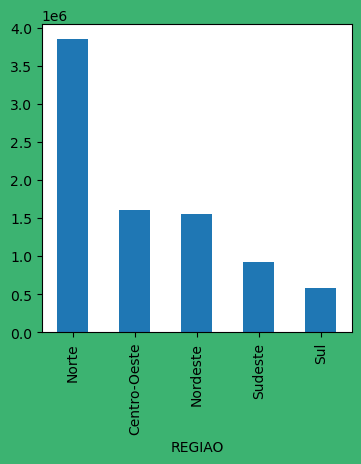

In [174]:
dfcompletoregiao.sort_values('AREA_TERRIT_KM2', ascending=False)['AREA_TERRIT_KM2'].plot(kind='bar', figsize=(4, 4));

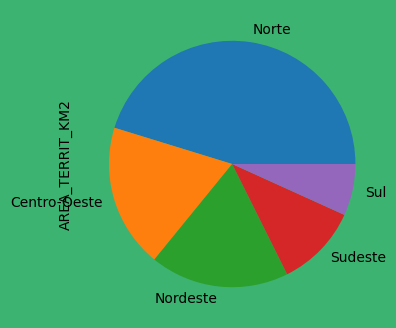

In [175]:
dfcompletoregiao.sort_values('AREA_TERRIT_KM2', ascending=False)['AREA_TERRIT_KM2'].plot(kind='pie', figsize=(4, 4));

<Axes: xlabel='REGIAO'>

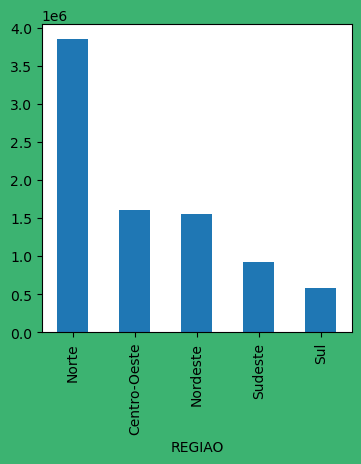

In [176]:
dfcompletoregiao.sort_values('AREA_TERRIT_KM2', ascending=False)['AREA_TERRIT_KM2'].plot.bar(figsize=(4, 4))

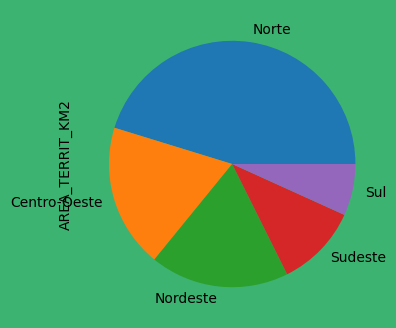

In [177]:
ax = dfcompletoregiao.sort_values('AREA_TERRIT_KM2', ascending=False)['AREA_TERRIT_KM2'].plot.pie(figsize=(4, 4))

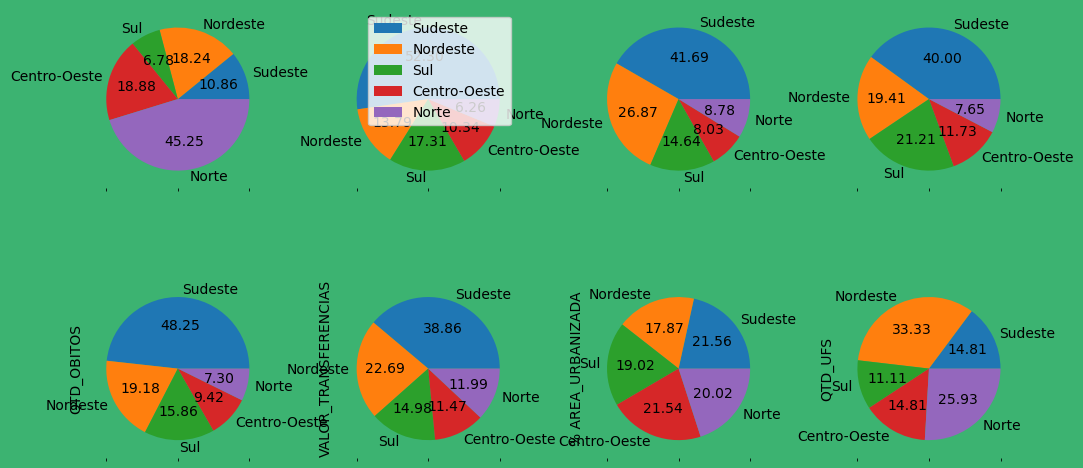

In [179]:
plt.rcParams["figure.figsize"] = [20, 20]
axes = dfcompletoregiao[['AREA_TERRIT_KM2', 'PIB2021', 'POPULACAO2024', 'QTD_CASOS',
       'QTD_OBITOS',  'VALOR_TRANSFERENCIAS',
       '% AREA_URBANIZADA', 'QTD_UFS']].plot.pie(subplots=True, layout=(2, 4), autopct='%.2f',
                                               figsize=(12, 6), sharex=True, rot=45, legend=False,
                                               )

axes[0,1].legend(loc=1)
for ax in axes[0, :]:
  ax.yaxis.label.set_visible(False)
plt.subplots_adjust( wspace = 0.4, hspace = 0.4)

<Figure size 2000x2000 with 0 Axes>

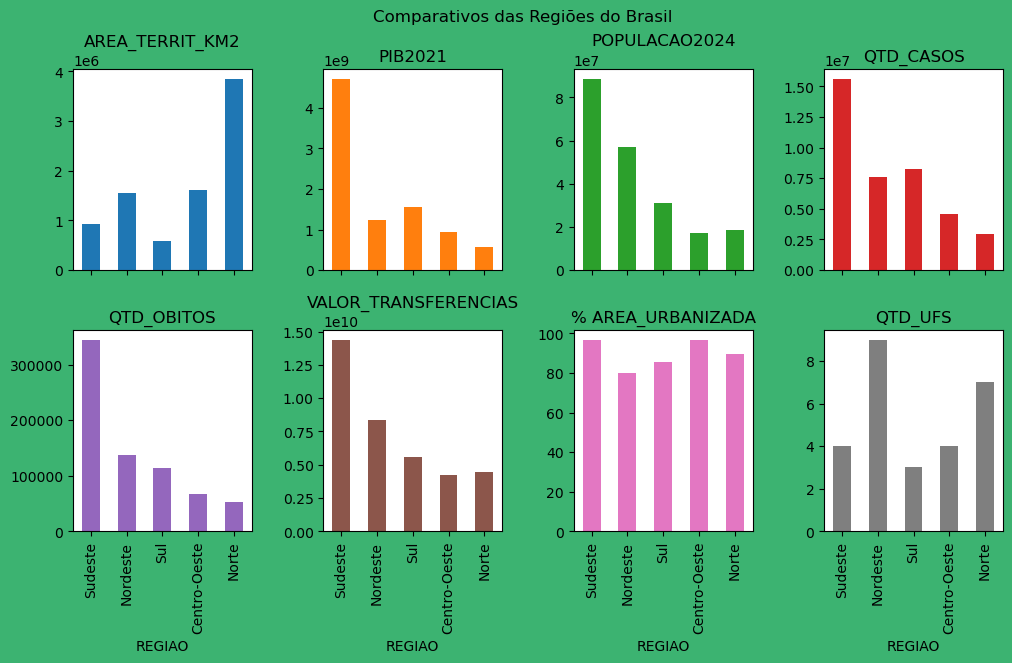

In [180]:
fig = plt.figure()
axes = dfcompletoregiao[['AREA_TERRIT_KM2', 'PIB2021', 'POPULACAO2024', 'QTD_CASOS',
       'QTD_OBITOS',  'VALOR_TRANSFERENCIAS',
       '% AREA_URBANIZADA', 'QTD_UFS']].plot.bar(subplots=True, layout=(2, 4), 
                                               figsize=(12, 6), sharex=True, rot=90, legend=False)
plt.subplots_adjust( wspace = 0.4, hspace = 0.3)
plt.suptitle("Comparativos das Regiões do Brasil")
plt.show()

In [181]:
dfcompleto.head()

UF_CODIGO             UF_NOME REGIAO_SIGLA  \
REGIAO       UF_SIGLA                                               
Centro-Oeste DF               53    Distrito Federal           CO   
             GO               52               Goiás           CO   
             MS               50  Mato Grosso do Sul           CO   
             MT               51         Mato Grosso           CO   
Nordeste     AL               27             Alagoas           NE   

                                           GOVERNADOR  AREA_TERRIT_KM2    IDH  \
REGIAO       UF_SIGLA                                                           
Centro-Oeste DF           Ibaneis Rocha Barros Júnior         5760.784  0.814   
             GO                  Ronaldo Ramos Caiado       340242.859  0.737   
             MS                 Eduardo Correa Riedel       357142.082  0.742   
             MT                 Mauro Mendes Ferreira       903208.361  0.736   
Nordeste     AL        Paulo Suruagy Do Amaral Dantas        27830.661  0.684   

                       RENDA_MENS_PER_CAPITA      PIB2021  POPULACAO2024  \
REGIAO       UF_SIGLA                                                      
Centro-Oeste DF                       3357.0  286943782.0      2982818.0   
             GO                       2017.0  269627874.0      7350483.0   
             MS                       2030.0  142203766.0      2901895.0   
             MT                       1991.0  233390203.0      3836399.0   
Nordeste     AL                       1110.0   76265620.0      3220104.0   

                       % AREA_URBANIZADA  VALOR_TRANSFERENCIAS  QTD_CASOS  \
REGIAO       UF_SIGLA                                                       
Centro-Oeste DF                    96.62          7.041236e+08     955972   
             GO                    90.29          1.332470e+09    2060518   
             MS                    85.64          7.225995e+08     637265   
             MT                    81.90          1.485644e+09     921668   
Nordeste     AL                    73.64          5.776719e+08     348729   

                       QTD_OBITOS  
REGIAO       UF_SIGLA              
Centro-Oeste DF             12028  
             GO             28669  
             MS             11305  
             MT             15254  
Nordeste     AL              7355

In [182]:
dfcompleto['OBITOS_100MIL'] = dfcompleto['QTD_OBITOS'] / (dfcompleto['POPULACAO2024'] / 100_000)

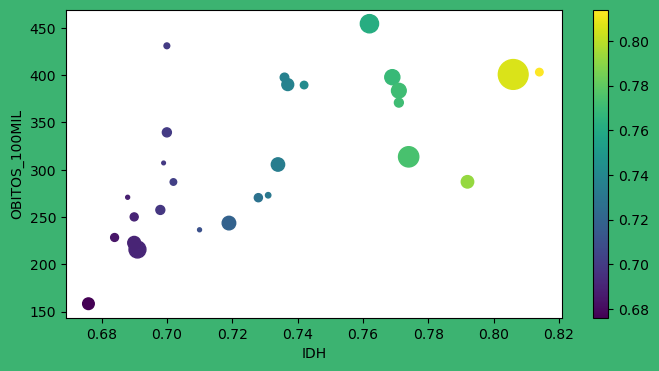

In [186]:
ax = dfcompleto.plot.scatter(x='IDH', y='OBITOS_100MIL', figsize=(8, 4) , s=dfcompleto['POPULACAO2024']//100_000,c=dfcompleto['IDH'],cmap='viridis')

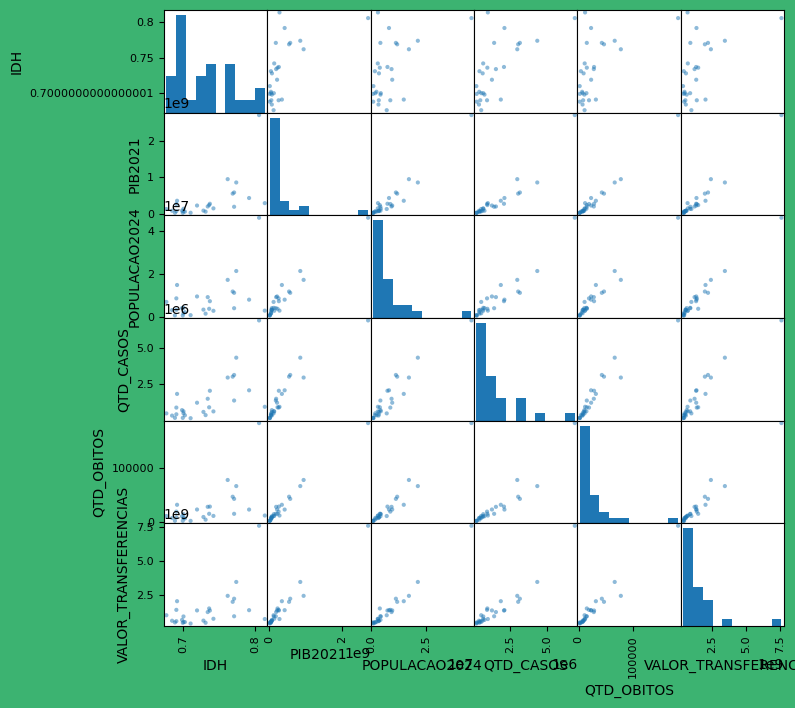

In [187]:
axes = scatter_matrix(dfcompleto[['IDH', 'PIB2021', 'POPULACAO2024', 'QTD_CASOS',
       'QTD_OBITOS',  'VALOR_TRANSFERENCIAS']], figsize=(8, 8), diagonal='hist')

In [188]:
dfregiaouf.head()

,REGIAO,UF_SIGLA,MÊS,QTD_CASOS,QTD_OBITOS
0,Centro-Oeste,DF,2020-02,0,0
1,Centro-Oeste,DF,2020-03,332,3
2,Centro-Oeste,DF,2020-04,1024,27
3,Centro-Oeste,DF,2020-05,8424,140
4,Centro-Oeste,DF,2020-06,39438,417


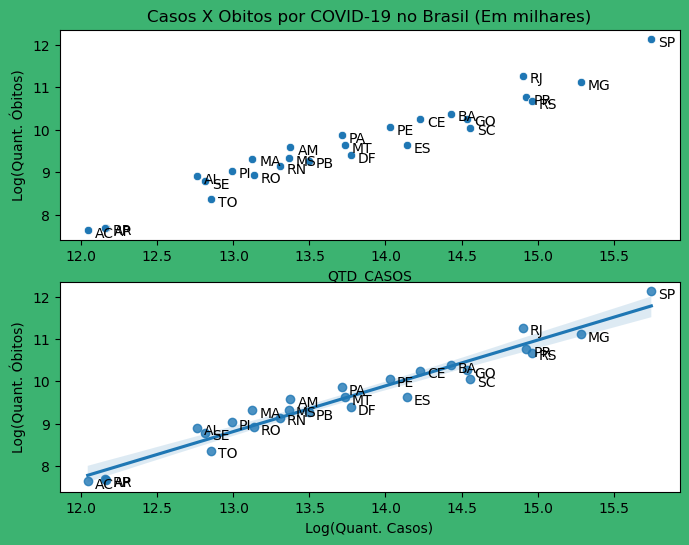

In [192]:
plt.rc('figure', figsize = (8, 6))
dfresumo = dfregiaouf[['UF_SIGLA','QTD_CASOS', 'QTD_OBITOS']].groupby('UF_SIGLA').sum()
l = dfresumo.index
x=np.log(dfresumo['QTD_CASOS'])
y=np.log(dfresumo['QTD_OBITOS'])

fig , (ax1, ax2) = plt.subplots(2, 1)

sns.scatterplot(x=x,y=y, ax=ax1)
ax1.set_title('Casos X Obitos por COVID-19 no Brasil (Em milhares)')
#ax1.set_xlabel('Região')
ax1.set_ylabel('Log(Quant. Óbitos)')
#ax1.set_xlabel('Log(Quant. Casos)')

for l1, x1, y1 in zip(l, x, y):
  ax1.annotate(l1, xy=(x1,y1),
               xytext=(5,-5),
               textcoords='offset points')
  
sns.regplot(x=x, y=y, ax=ax2)
ax2.set_ylabel('Log(Quant. Óbitos)')
ax2.set_xlabel('Log(Quant. Casos)')

for l1, x1, y1 in zip(l, x, y):
  ax2.annotate(l1, xy=(x1,y1),
               xytext=(5,-5),
               textcoords='offset points')
plt.show()

In [193]:
dfregiaouf.head()

,REGIAO,UF_SIGLA,MÊS,QTD_CASOS,QTD_OBITOS
0,Centro-Oeste,DF,2020-02,0,0
1,Centro-Oeste,DF,2020-03,332,3
2,Centro-Oeste,DF,2020-04,1024,27
3,Centro-Oeste,DF,2020-05,8424,140
4,Centro-Oeste,DF,2020-06,39438,417


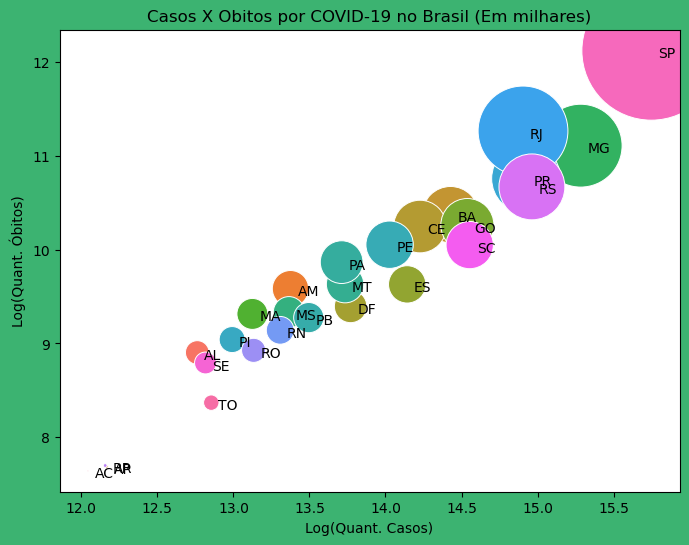

In [194]:
plt.rc('figure', figsize = (8, 6))
dfresumo = dfregiaouf[['UF_SIGLA','QTD_CASOS', 'QTD_OBITOS']].groupby('UF_SIGLA').sum()

x= np.log(dfresumo['QTD_CASOS'])
y= np.log(dfresumo['QTD_OBITOS'])
l = dfresumo.index
s = dfresumo['QTD_OBITOS'] 

fig , ax1 = plt.subplots()

sns.scatterplot(x=x, y=y, ax=ax1, size=s , hue=l, sizes=(1, 10000), legend=False )
ax1.set_title('Casos X Obitos por COVID-19 no Brasil (Em milhares)')
ax1.set_ylabel('Log(Quant. Óbitos)')
ax1.set_xlabel('Log(Quant. Casos)')

for l1, x1, y1 in zip(l, x, y):
  ax1.annotate(l1, xy=(x1,y1),
               xytext=(5,-5),
               textcoords='offset points')
  
plt.show()

In [195]:
dfregiaouf.head()

,REGIAO,UF_SIGLA,MÊS,QTD_CASOS,QTD_OBITOS
0,Centro-Oeste,DF,2020-02,0,0
1,Centro-Oeste,DF,2020-03,332,3
2,Centro-Oeste,DF,2020-04,1024,27
3,Centro-Oeste,DF,2020-05,8424,140
4,Centro-Oeste,DF,2020-06,39438,417


<Axes: xlabel='MÊS'>

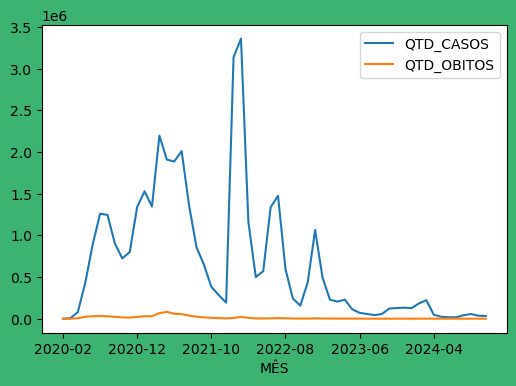

In [196]:
dfregiaouf[['MÊS','QTD_CASOS', 'QTD_OBITOS']].groupby('MÊS').sum().plot(figsize=(6, 4))

In [209]:
#dfcovid = pd.read_csv(nome_arquivo_covid, sep=';')
dfcovid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN


In [210]:
filtro = (dfcovid['estado'].isna() == False ) & ( dfcovid['codmun'].isna()  )
dfcovid = dfcovid[filtro][['regiao', 'estado', 'data' , 'casosNovos', 'obitosNovos']]

dfcovid['mes'] = dfcovid['data'].map(lambda x : x[:7])


print(dfcovid.shape)
dfcovid.head()

(93798, 6)


,regiao,estado,data,casosNovos,obitosNovos,mes
158,Norte,RO,2020-02-25,0,0,2020-02
159,Norte,RO,2020-02-26,0,0,2020-02
160,Norte,RO,2020-02-27,0,0,2020-02
161,Norte,RO,2020-02-28,0,0,2020-02
162,Norte,RO,2020-02-29,0,0,2020-02


<Axes: xlabel='data'>

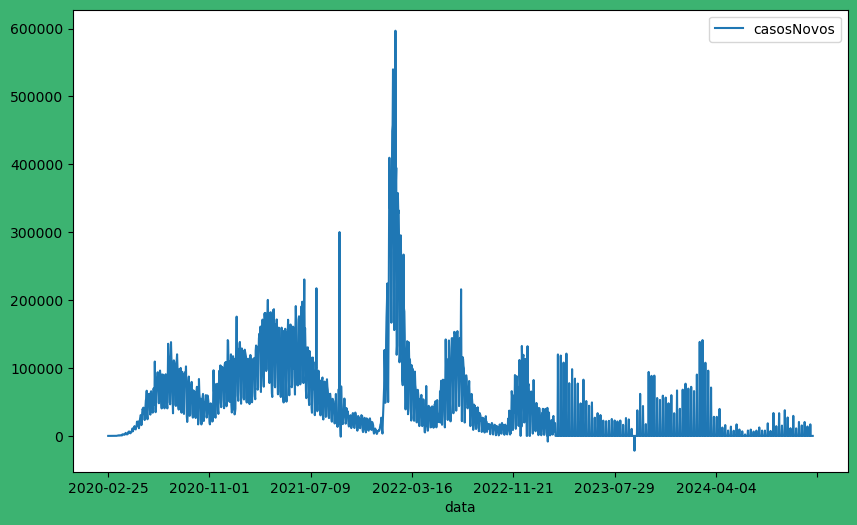

In [211]:
dfcovid[['data','casosNovos']].groupby('data').sum().plot(figsize=(10, 6))

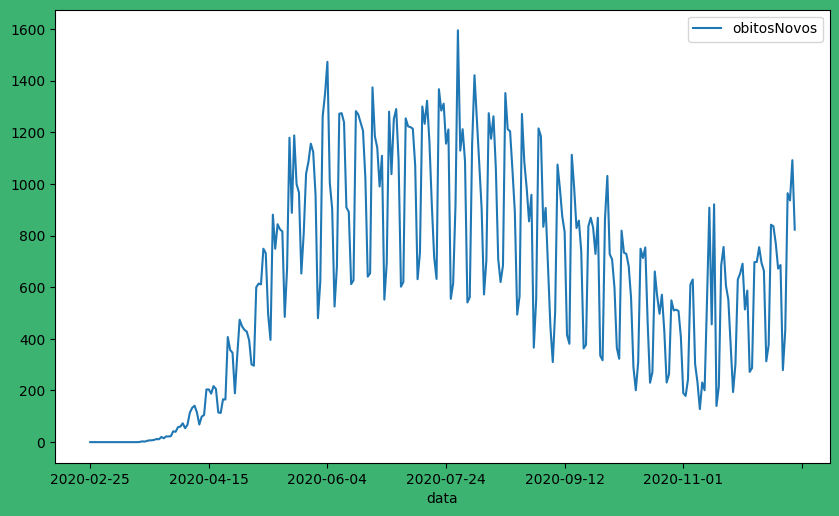

In [ ]:
dfcovid[['data','obitosNovos']].groupby('data').sum().plot(figsize=(10, 6))

array([<Axes: xlabel='MÊS'>, <Axes: xlabel='MÊS'>], dtype=object)

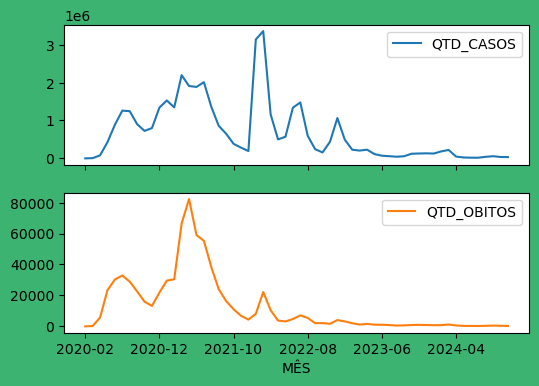

In [212]:
dfregiaouf[['MÊS','QTD_CASOS', 'QTD_OBITOS']].groupby('MÊS').sum().plot(figsize=(6, 4), subplots=True)

<Axes: xlabel='MÊS'>

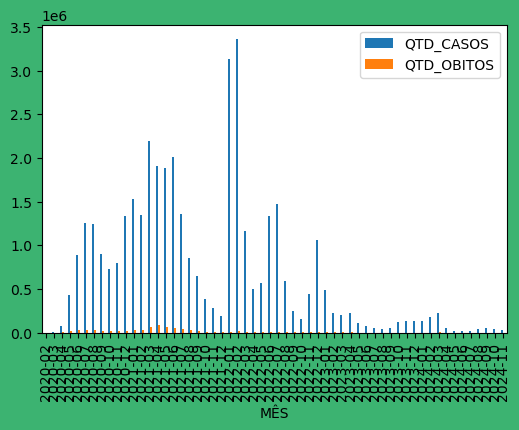

In [213]:
dfregiaouf[['MÊS','QTD_CASOS', 'QTD_OBITOS']].groupby('MÊS').sum().plot(kind='bar',figsize=(6, 4))

array([<Axes: title={'center': 'QTD_CASOS'}, xlabel='MÊS'>,
       <Axes: title={'center': 'QTD_OBITOS'}, xlabel='MÊS'>], dtype=object)

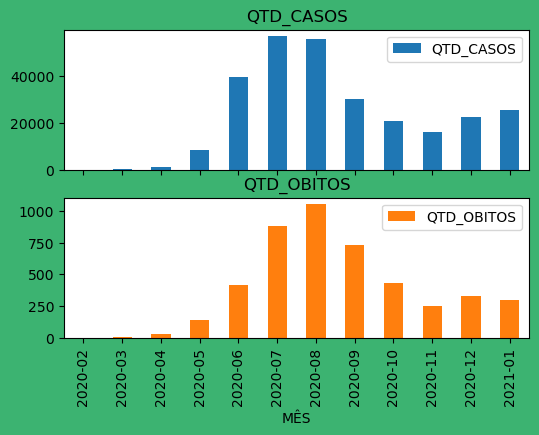

In [216]:
dfregiaouf[['MÊS','QTD_CASOS', 'QTD_OBITOS']][0:12].groupby('MÊS').sum().plot(kind='bar',figsize=(6, 4), subplots=True)

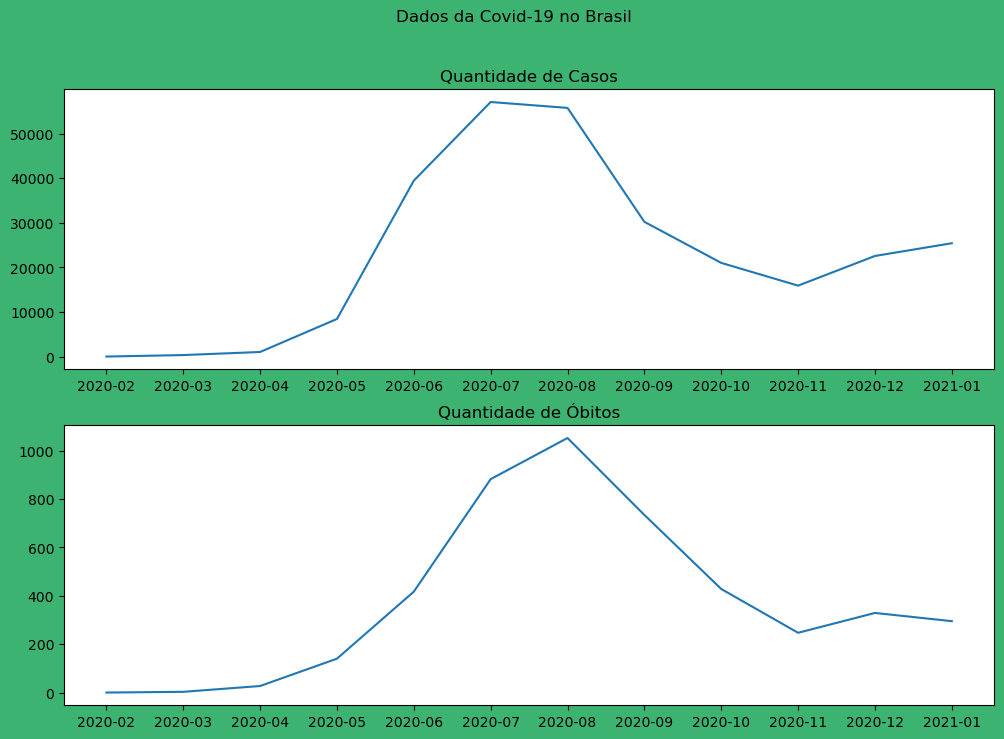

In [217]:
dfresumo = dfregiaouf[['MÊS','QTD_CASOS', 'QTD_OBITOS']][0:12].groupby('MÊS').sum()
xmeses = dfresumo.index
ycasos = dfresumo['QTD_CASOS']
yobitos = dfresumo['QTD_OBITOS']
plt.figure(figsize=[12,8])
plt.subplot(2, 1, 1)
plt.plot(xmeses,ycasos)
plt.title("Quantidade de Casos")

plt.subplot(2, 1, 2)
plt.plot(xmeses,yobitos)
plt.title("Quantidade de Óbitos")


plt.suptitle("Dados da Covid-19 no Brasil")
plt.show()

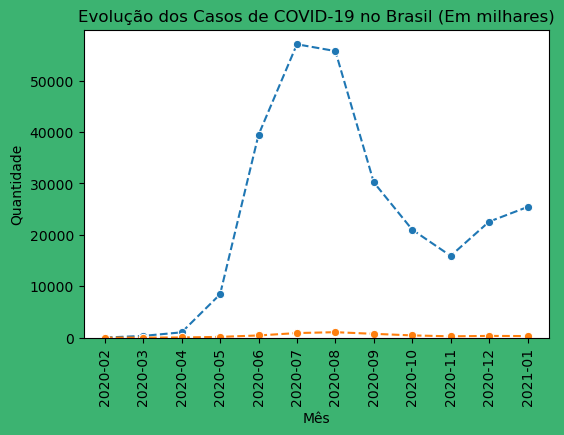

In [218]:
plt.rcParams["figure.figsize"] = [6, 4]

dfresumo = dfregiaouf[['MÊS','QTD_CASOS', 'QTD_OBITOS']][0:12].groupby('MÊS').sum()

x= dfresumo.index
y= dfresumo['QTD_CASOS']

fig = sns.lineplot(x=x, y=y, marker='o', linestyle='dashed')

y= dfresumo['QTD_OBITOS']
fig = sns.lineplot(x=x, y=y, marker='o', linestyle='dashed')

plt.title('Evolução dos Casos de COVID-19 no Brasil (Em milhares)')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.ylim(bottom=0)
plt.xticks(rotation=90)
plt.show()

In [219]:
dfcomplentocompbrasil.head()

AREA_TERRIT_KM2         IDH   PIB2021  POPULACAO2024  \
REGIAO       UF_SIGLA                                                         
Centro-Oeste DF               0.067691  111.484224  3.183969       1.403126   
             GO               3.997957  100.938419  2.991829       3.457688   
             MS               4.196528  101.623212  1.577913       1.365060   
             MT              10.612973  100.801461  2.589731       1.804653   
Nordeste     AL               0.327019   93.679619  0.846254       1.514746   

                       % AREA_URBANIZADA  QTD_CASOS  QTD_OBITOS  \
REGIAO       UF_SIGLA                                             
Centro-Oeste DF                99.906938   2.450110    1.684099   
             GO                93.361597   5.281008    4.014085   
             MS                88.553407   1.633279    1.582868   
             MT                84.686175   2.362191    2.135786   
Nordeste     AL                76.145176   0.893776    1.029809   

                       RENDA_MENS_PER_CAPITA  VALOR_TRANSFERENCIAS  
REGIAO       UF_SIGLA                                               
Centro-Oeste DF                   200.960025              1.903037  
             GO                   120.743631              3.601271  
             MS                   121.521850              1.952972  
             MT                   119.187194              4.015254  
Nordeste     AL                    66.447908              1.561275

In [220]:
dfcomplentocompregiao.head(27)


AREA_TERRIT_KM2         IDH    PIB2021  POPULACAO2024  \
REGIAO       UF_SIGLA                                                          
Centro-Oeste DF               0.358625  107.494223  30.782489      17.472404   
             GO              21.181062   97.325850  28.924889      43.056803   
             MS              22.233086   97.986134  15.255204      16.998382   
             MT              56.227227   97.193793  25.037418      22.472411   
Nordeste     AL               1.793010   97.374249   6.135099       5.638217   
             BA              36.385090   98.370769  28.365934      26.002395   
             CE               9.592630  104.492249  15.677282      16.167601   
             MA              21.238031   96.235369  10.053929      12.275788   
             PB               3.637942   99.367289   6.232011       7.257727   
             PE               6.318092  102.356849  17.763087      16.702292   
             PI              16.219525   98.228409   5.150682       5.910562   
             RN               3.402296  103.638089   6.450046       6.033872   
             SE               1.413383   99.936729   4.171930       4.011544   
Norte        AC               4.263588  101.057340   3.789366       4.716989   
             AM              40.493915   99.633998  23.318470      22.931758   
             AP               3.699969   97.925986   3.563401       4.300295   
             PA              32.355294   98.210655  46.609090      46.409266   
             RO               6.174482   99.633998  10.312681       9.353445   
             RR               5.808054   99.491663   3.227043       3.839412   
             TO               7.204699  104.046360   9.179949       8.448834   
Sudeste      ES               4.983401   99.068423   3.953686       4.629018   
             MG              63.437206   99.453903  18.196404      24.061438   
             RJ               4.732035   97.911982  20.142254      19.431423   
             SP              26.847358  103.565692  57.707655      51.878121   
Sul          PR              34.556313   98.927959  35.258579      38.005519   
             RS              48.845009   99.185249  37.265892      36.093940   
             SC              16.598678  101.886792  27.475529      25.900542   

                       % AREA_URBANIZADA  QTD_CASOS  QTD_OBITOS  \
REGIAO       UF_SIGLA                                             
Centro-Oeste DF               100.000000  20.893631   17.883906   
             GO                93.448561  45.034481   42.626680   
             MS                88.635893  13.928002   16.808909   
             MT                84.765059  20.143886   22.680504   
Nordeste     AL                91.877729   4.604889    5.369946   
             BA                89.918902  24.355960   23.388286   
             CE                93.686837  19.922813   20.600003   
             MA                78.689956   6.617204    8.107121   
             PB                94.036182   9.586312    7.793175   
             PE               100.000000  16.315915   16.968445   
             PI                82.058640   5.792751    6.165764   
             RN                97.092951   7.943532    6.805339   
             SE                91.715533   4.860626    4.801922   
Norte        AC                80.848458   5.684565    3.996086   
             AM                88.152767  21.570359   27.886276   
             AP               100.000000   6.430183    4.172582   
             PA                76.260995  30.199836   37.017995   
             RO                81.527670  16.924459   14.440011   
             RR                85.079613   6.377745    4.224379   
             TO                87.751921  12.812854    8.262671   
Sudeste      ES                88.191500   8.885627    4.416250   
             MG                86.216524  27.811901   19.409967   
             RJ               100.000000  19.034087   22.706339   
             SP            

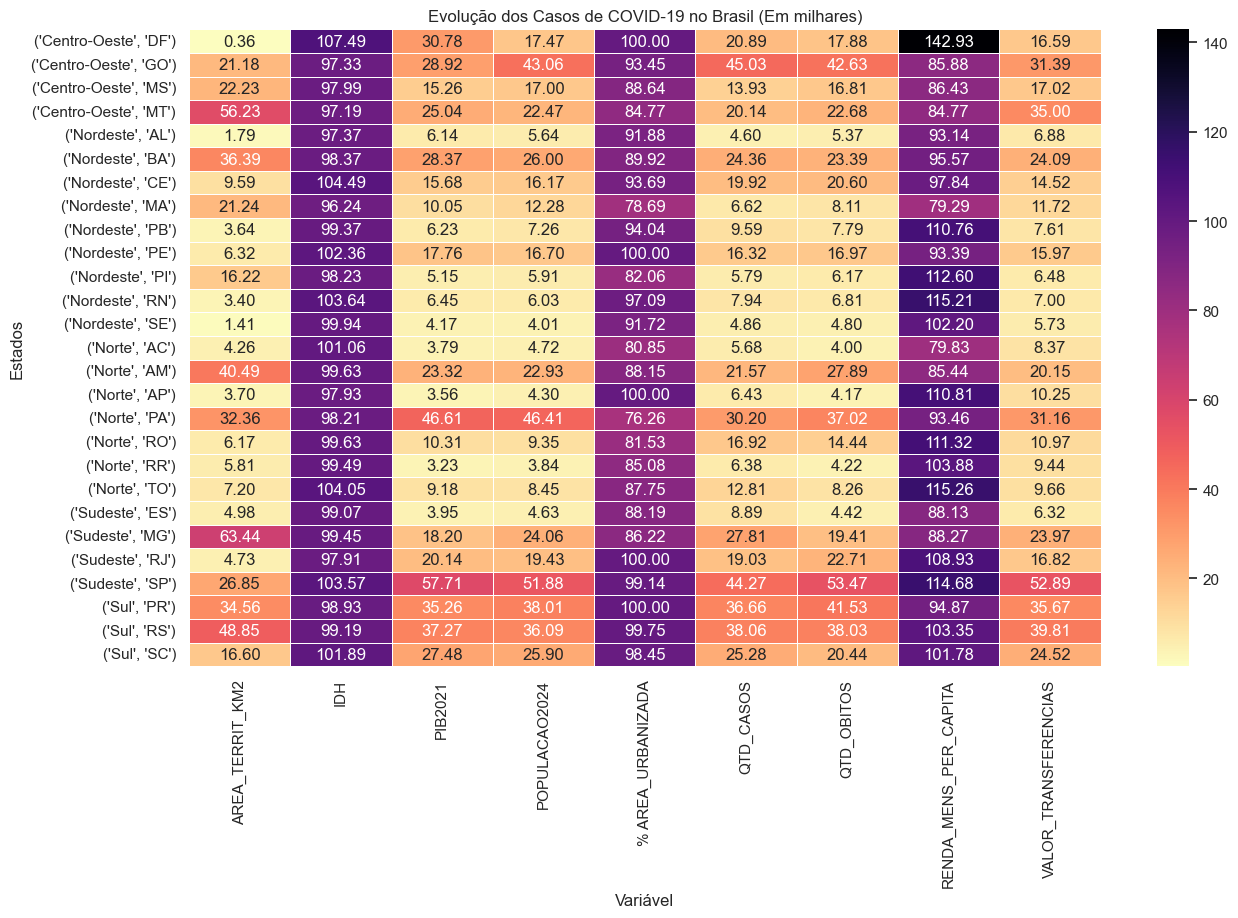

In [221]:
sns.set_theme(rc={'figure.figsize':(14.7,8.27)})

dados  = dfcomplentocompregiao.to_numpy()
estados = dfcomplentocompregiao.index
variavel =  dfcomplentocompregiao.columns
fig = sns.heatmap(dados,linewidths=.5,annot=True, fmt=".2f", cmap = 'magma_r',
                  xticklabels = variavel, yticklabels = estados)
sns.cubehelix_palette(as_cmap=True, reverse=True)
plt.title('Evolução dos Casos de COVID-19 no Brasil (Em milhares)')
plt.xlabel('Variável')
plt.ylabel('Estados')
plt.show()